<a href="https://colab.research.google.com/github/fyansyarafa/bank-marketing-classification/blob/main/bank_marketing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tujuan

Menghasilkan model klasifikasi prediktif terhadap deposit nasabah berupa 'yes' atau 'no' berdasarkan fitur-fitur independen pada dataset menggukan beberapa metode klasifikasi machine learning (Decision Tree, Random Forest, Logistic Regression dan KNN). Kemudian, akan dipilih beberapa model terbaik berdasarkan beberapa metrics evaluasi seperti elemen-elemen yang ada pada classfification report, confusion matrix, dan ROC curve.

# Import Library dan Data

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Telkom Digital Talent Incubator/Bank Marketing Classification/bank-marketing dataset/bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Exploratory Data Analysis

Mengecek missing values pada data dan tipe data yang tidak sesuai (jika ada):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Missing values:

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Deposit

Melihat kondisi fitur target deposit, seperti proporsi kategori deposit:

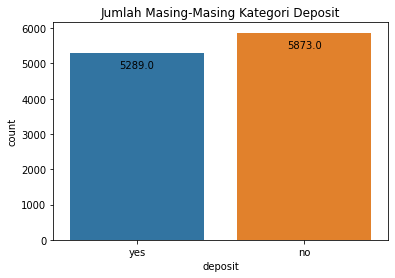

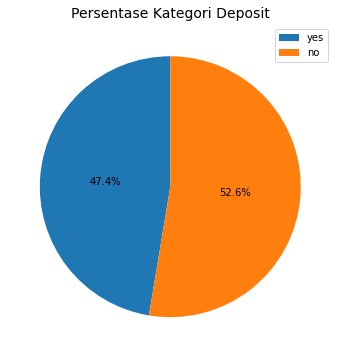

In [6]:

# countplot
splot=sns.countplot(df.deposit)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Jumlah Masing-Masing Kategori Deposit')

# pie chart
dict = {
    'yes' : len(df[df.deposit == 'yes']['deposit']),
    'no' : len(df[df.deposit == 'no']['deposit'])
}
ser_deposit = pd.Series(dict)
ser_deposit

pie, ax = plt.subplots(figsize=[10,6])
labels = ser_deposit.keys()
plt.pie(x=ser_deposit, autopct="%.1f%%", pctdistance=0.5, startangle=90)
plt.title("Persentase Kategori Deposit", fontsize=14)
plt.legend(labels=labels);

# subplot


Sepertinya proporsi kategori no pada fitur deposit sedikit lebih tinggi dibanding yes.

## Hubungan antar variabel numerik

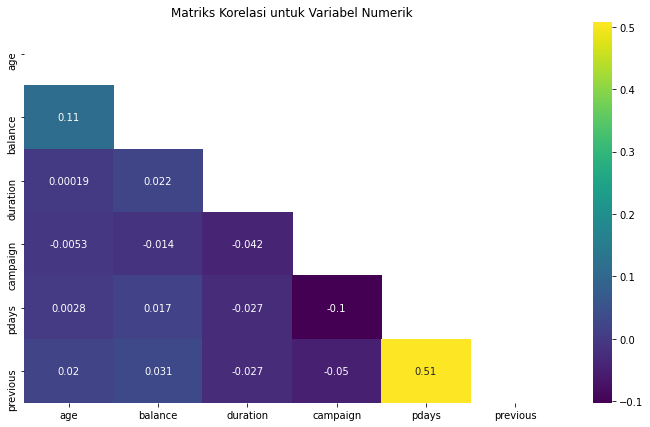

In [7]:
matrix = np.triu(df[['age','balance','duration','campaign','pdays','previous']].corr())
plt.figure(figsize=(12,7))
sns.heatmap(df[['age','balance','duration','campaign','pdays','previous']].corr(), annot=True, cmap='viridis', mask=matrix)
plt.title('Matriks Korelasi untuk Variabel Numerik');

Hanya terdapat satu hubungan yang menonjol antara `pdays` dan `previous`, dengan nilai korelasi 0.51 dengan arah positif.

## Age

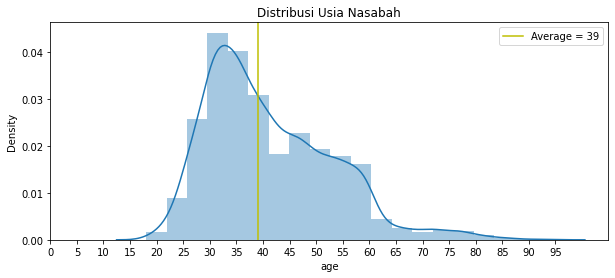

In [8]:
plt.figure(figsize=(10,4))
sns.distplot(df.age,bins=20)
plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['age'].median(), label='Average = {}'.format(round(df['age'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi Usia Nasabah')
plt.legend();

Nilai *average* dihasilkan dari nilai *median* fitur `age`, karena sepertinya terdapat *outlier* sehingga mempengaruhi nilai *mean*.

In [9]:
age_deposit_yes = df['deposit'] == 'yes'
age_deposit_yes = df.loc[age_deposit_yes]
age_deposit_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
age_deposit_no = df['deposit'] == 'no'
age_deposit_no = df.loc[age_deposit_no]
age_deposit_no.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no


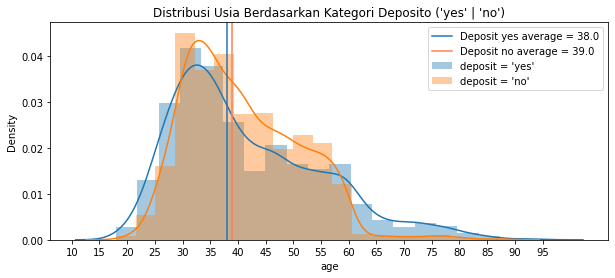

In [11]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(age_deposit_yes.age, bins=20,label="deposit = 'yes'")
sns.distplot(age_deposit_no.age, bins = 20,label="deposit = 'no'")
plt.axvline(age_deposit_yes.age.median(),label='Deposit yes average = {}'.format(round(age_deposit_yes.age.median(),3)))
plt.axvline(age_deposit_no.age.median(),label='Deposit no average = {}'.format(round(age_deposit_no.age.median(),3)),c='coral')
plt.title("Distribusi Usia Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();

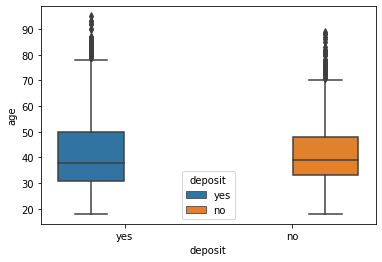

In [12]:
sns.boxplot(data=df, x = 'deposit', y = 'age', hue='deposit')

In [13]:
deleted = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list2 = [ele for ele in df.columns if ele not in deleted]


In [14]:
age_to_cat = df[list2]
age_to_cat['age'] = df['age']
age_to_cat.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,deposit,age
0,admin.,married,secondary,no,yes,no,unknown,5,may,unknown,yes,59
1,admin.,married,secondary,no,no,no,unknown,5,may,unknown,yes,56
2,technician,married,secondary,no,yes,no,unknown,5,may,unknown,yes,41
3,services,married,secondary,no,yes,no,unknown,5,may,unknown,yes,55
4,admin.,married,tertiary,no,no,no,unknown,5,may,unknown,yes,54


### Age vs variabel-variabel kategorik

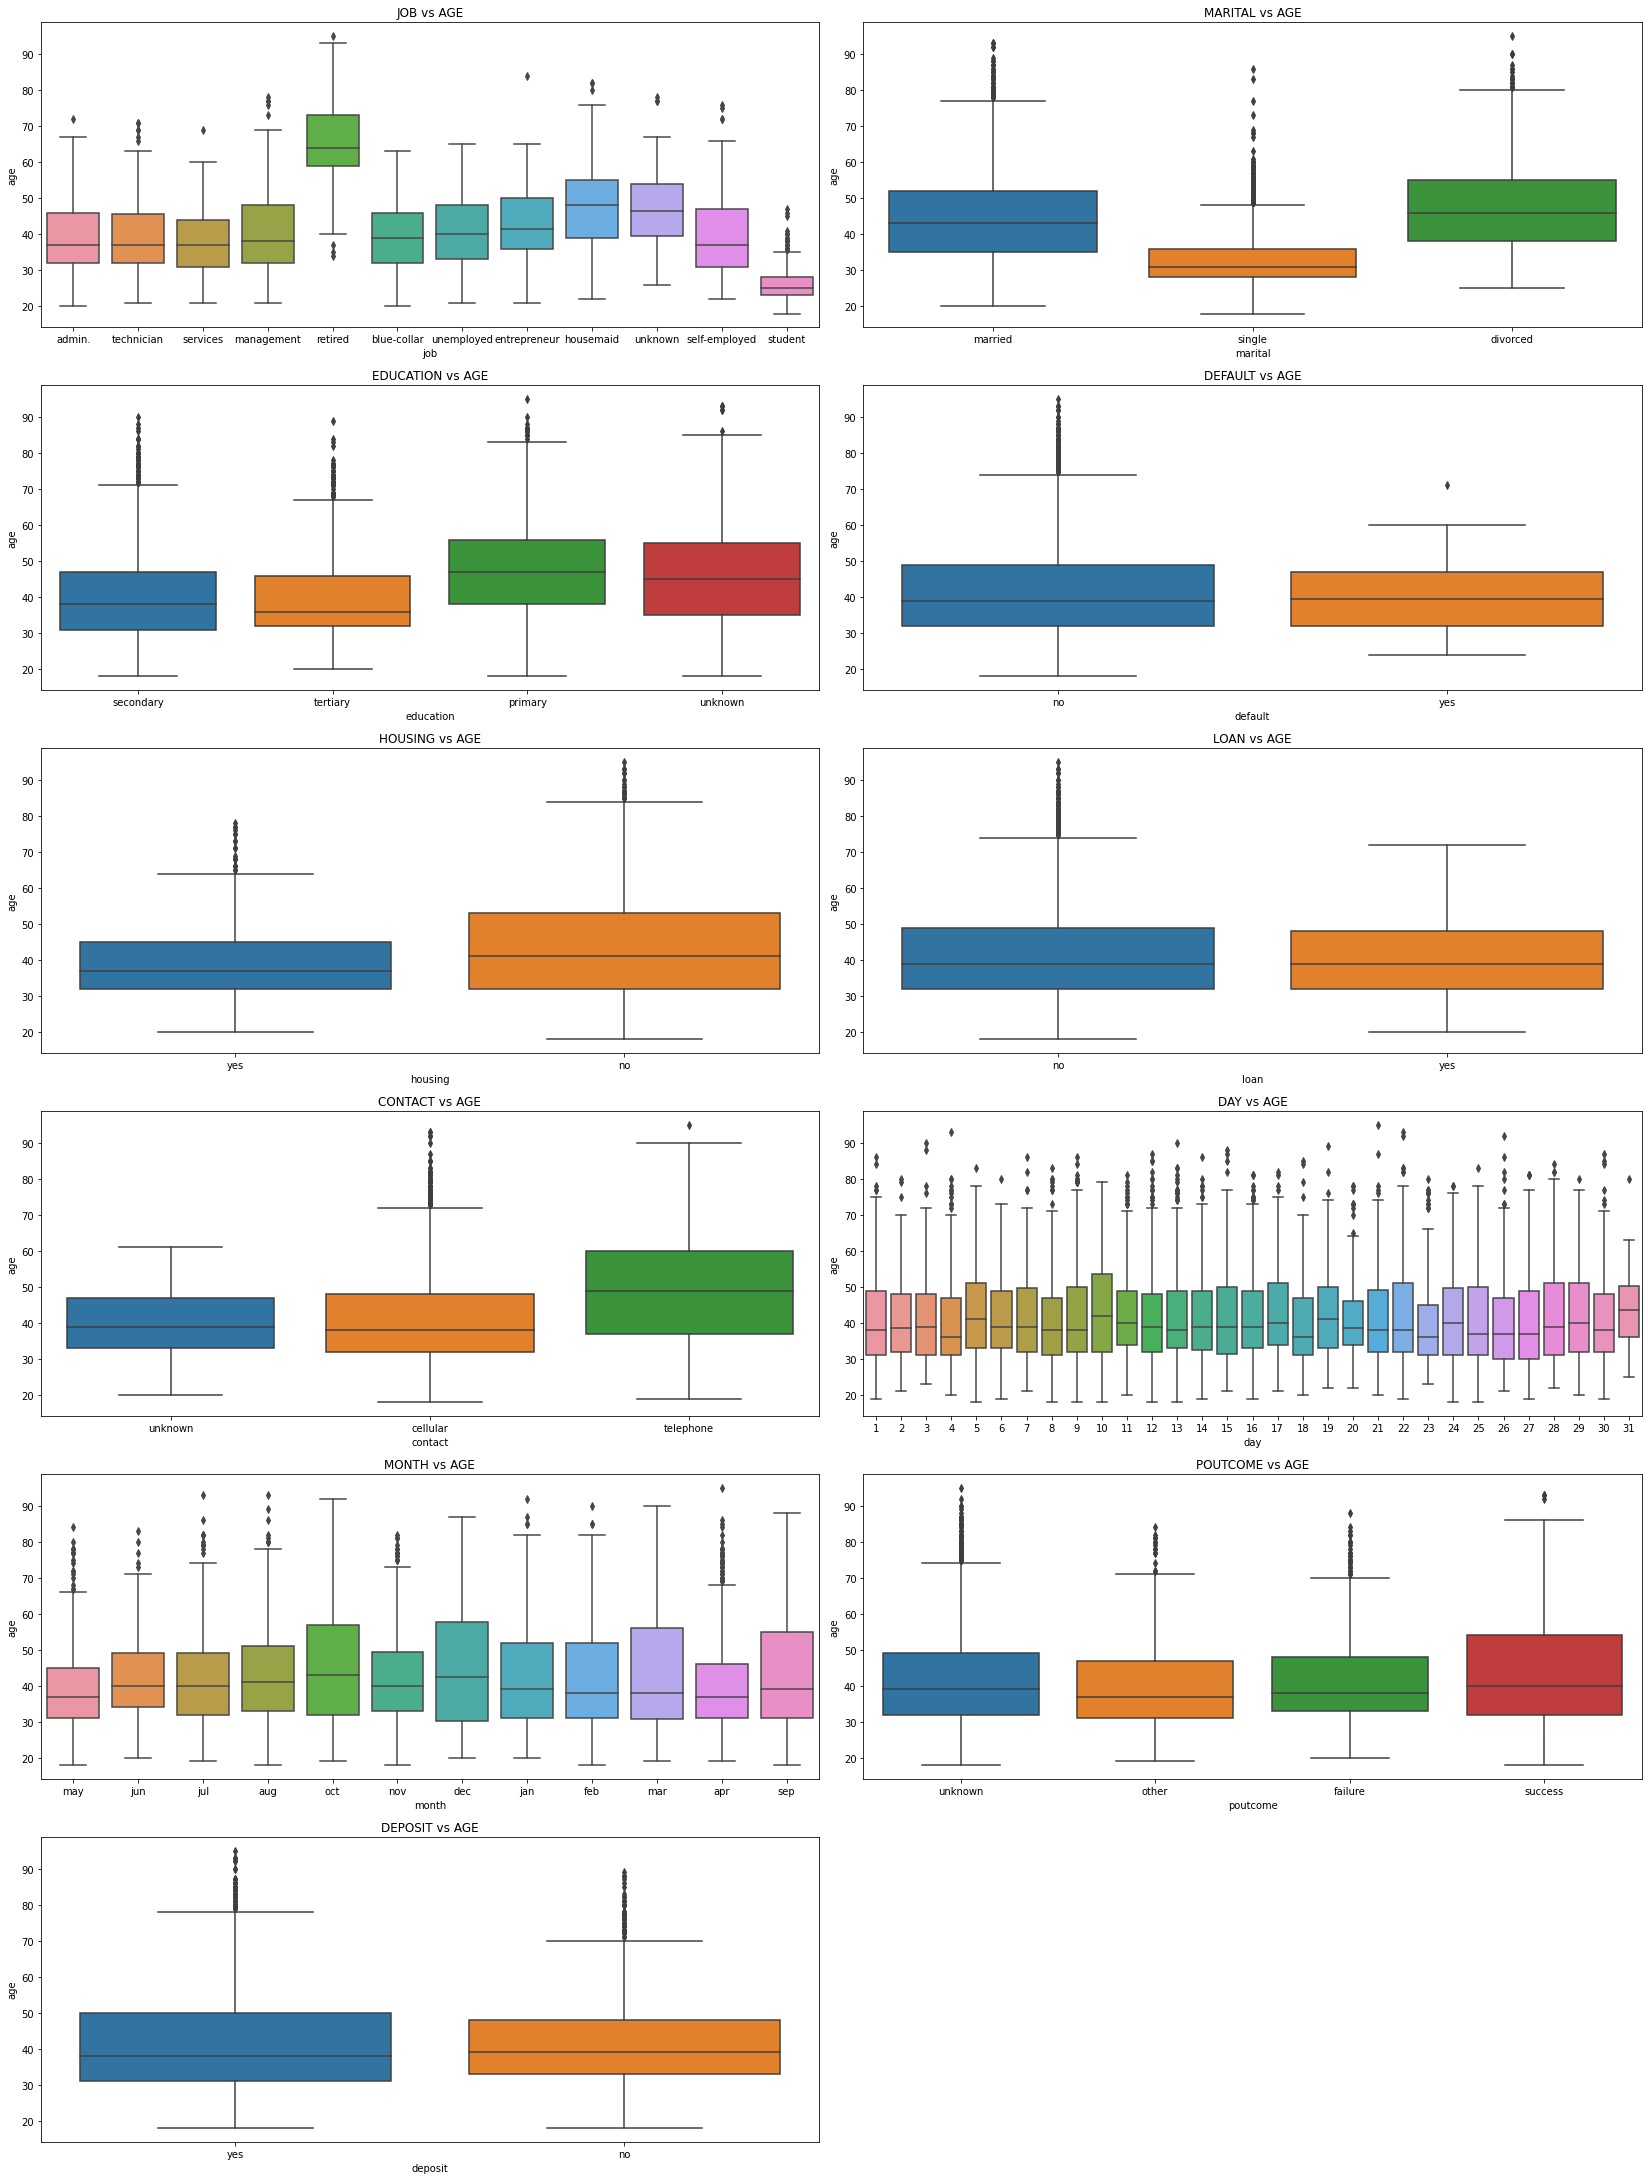

In [15]:
 # age vs categorical variables
 plt.figure(figsize=(23,35))
 for i in range(len(age_to_cat.columns)-1):
   plt.subplot(7,2,i+1)
   sns.boxplot(data=age_to_cat, x=age_to_cat.columns[i], y = 'age')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
   plt.title(age_to_cat.columns[i].upper()+' vs AGE')
plt.tight_layout()

## Balance

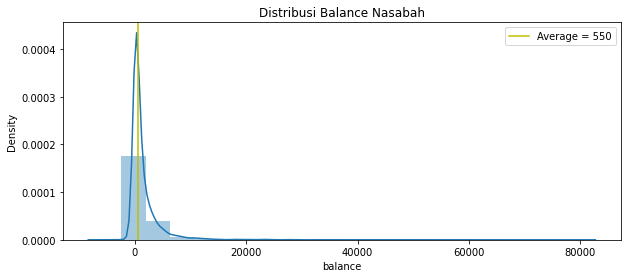

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(df.balance,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['balance'].median(), label='Average = {}'.format(round(df['balance'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi Balance Nasabah')
plt.legend();

In [17]:
balance_deposit_yes = df['deposit'] == 'yes'
balance_deposit_yes = df.loc[balance_deposit_yes]
balance_deposit_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
balance_deposit_no = df['deposit'] == 'no'
balance_deposit_no = df.loc[balance_deposit_no]
balance_deposit_no.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no


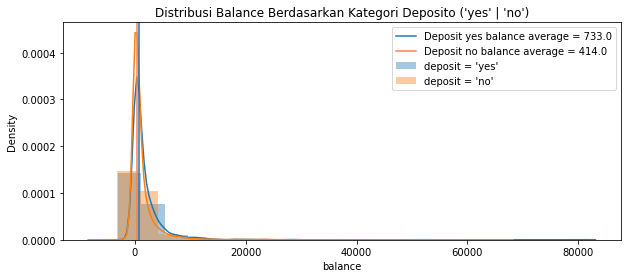

In [19]:
plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(balance_deposit_yes.balance, bins=20,label="deposit = 'yes'")
sns.distplot(balance_deposit_no.balance, bins = 20,label="deposit = 'no'")
plt.axvline(balance_deposit_yes.balance.median(),label='Deposit yes balance average = {}'.format(round(balance_deposit_yes.balance.median(),3)))
plt.axvline(balance_deposit_no.balance.median(),label='Deposit no balance average = {}'.format(round(balance_deposit_no.balance.median(),3)),c='coral')
plt.title("Distribusi Balance Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();

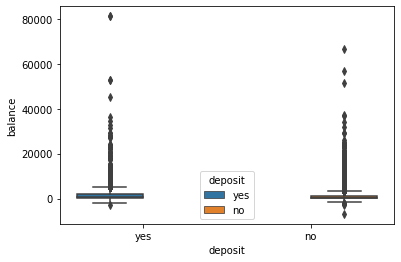

In [20]:
sns.boxplot(data=df, x = 'deposit', y = 'balance', hue='deposit');

### Balance vs Variabel-Variabel Kategorik

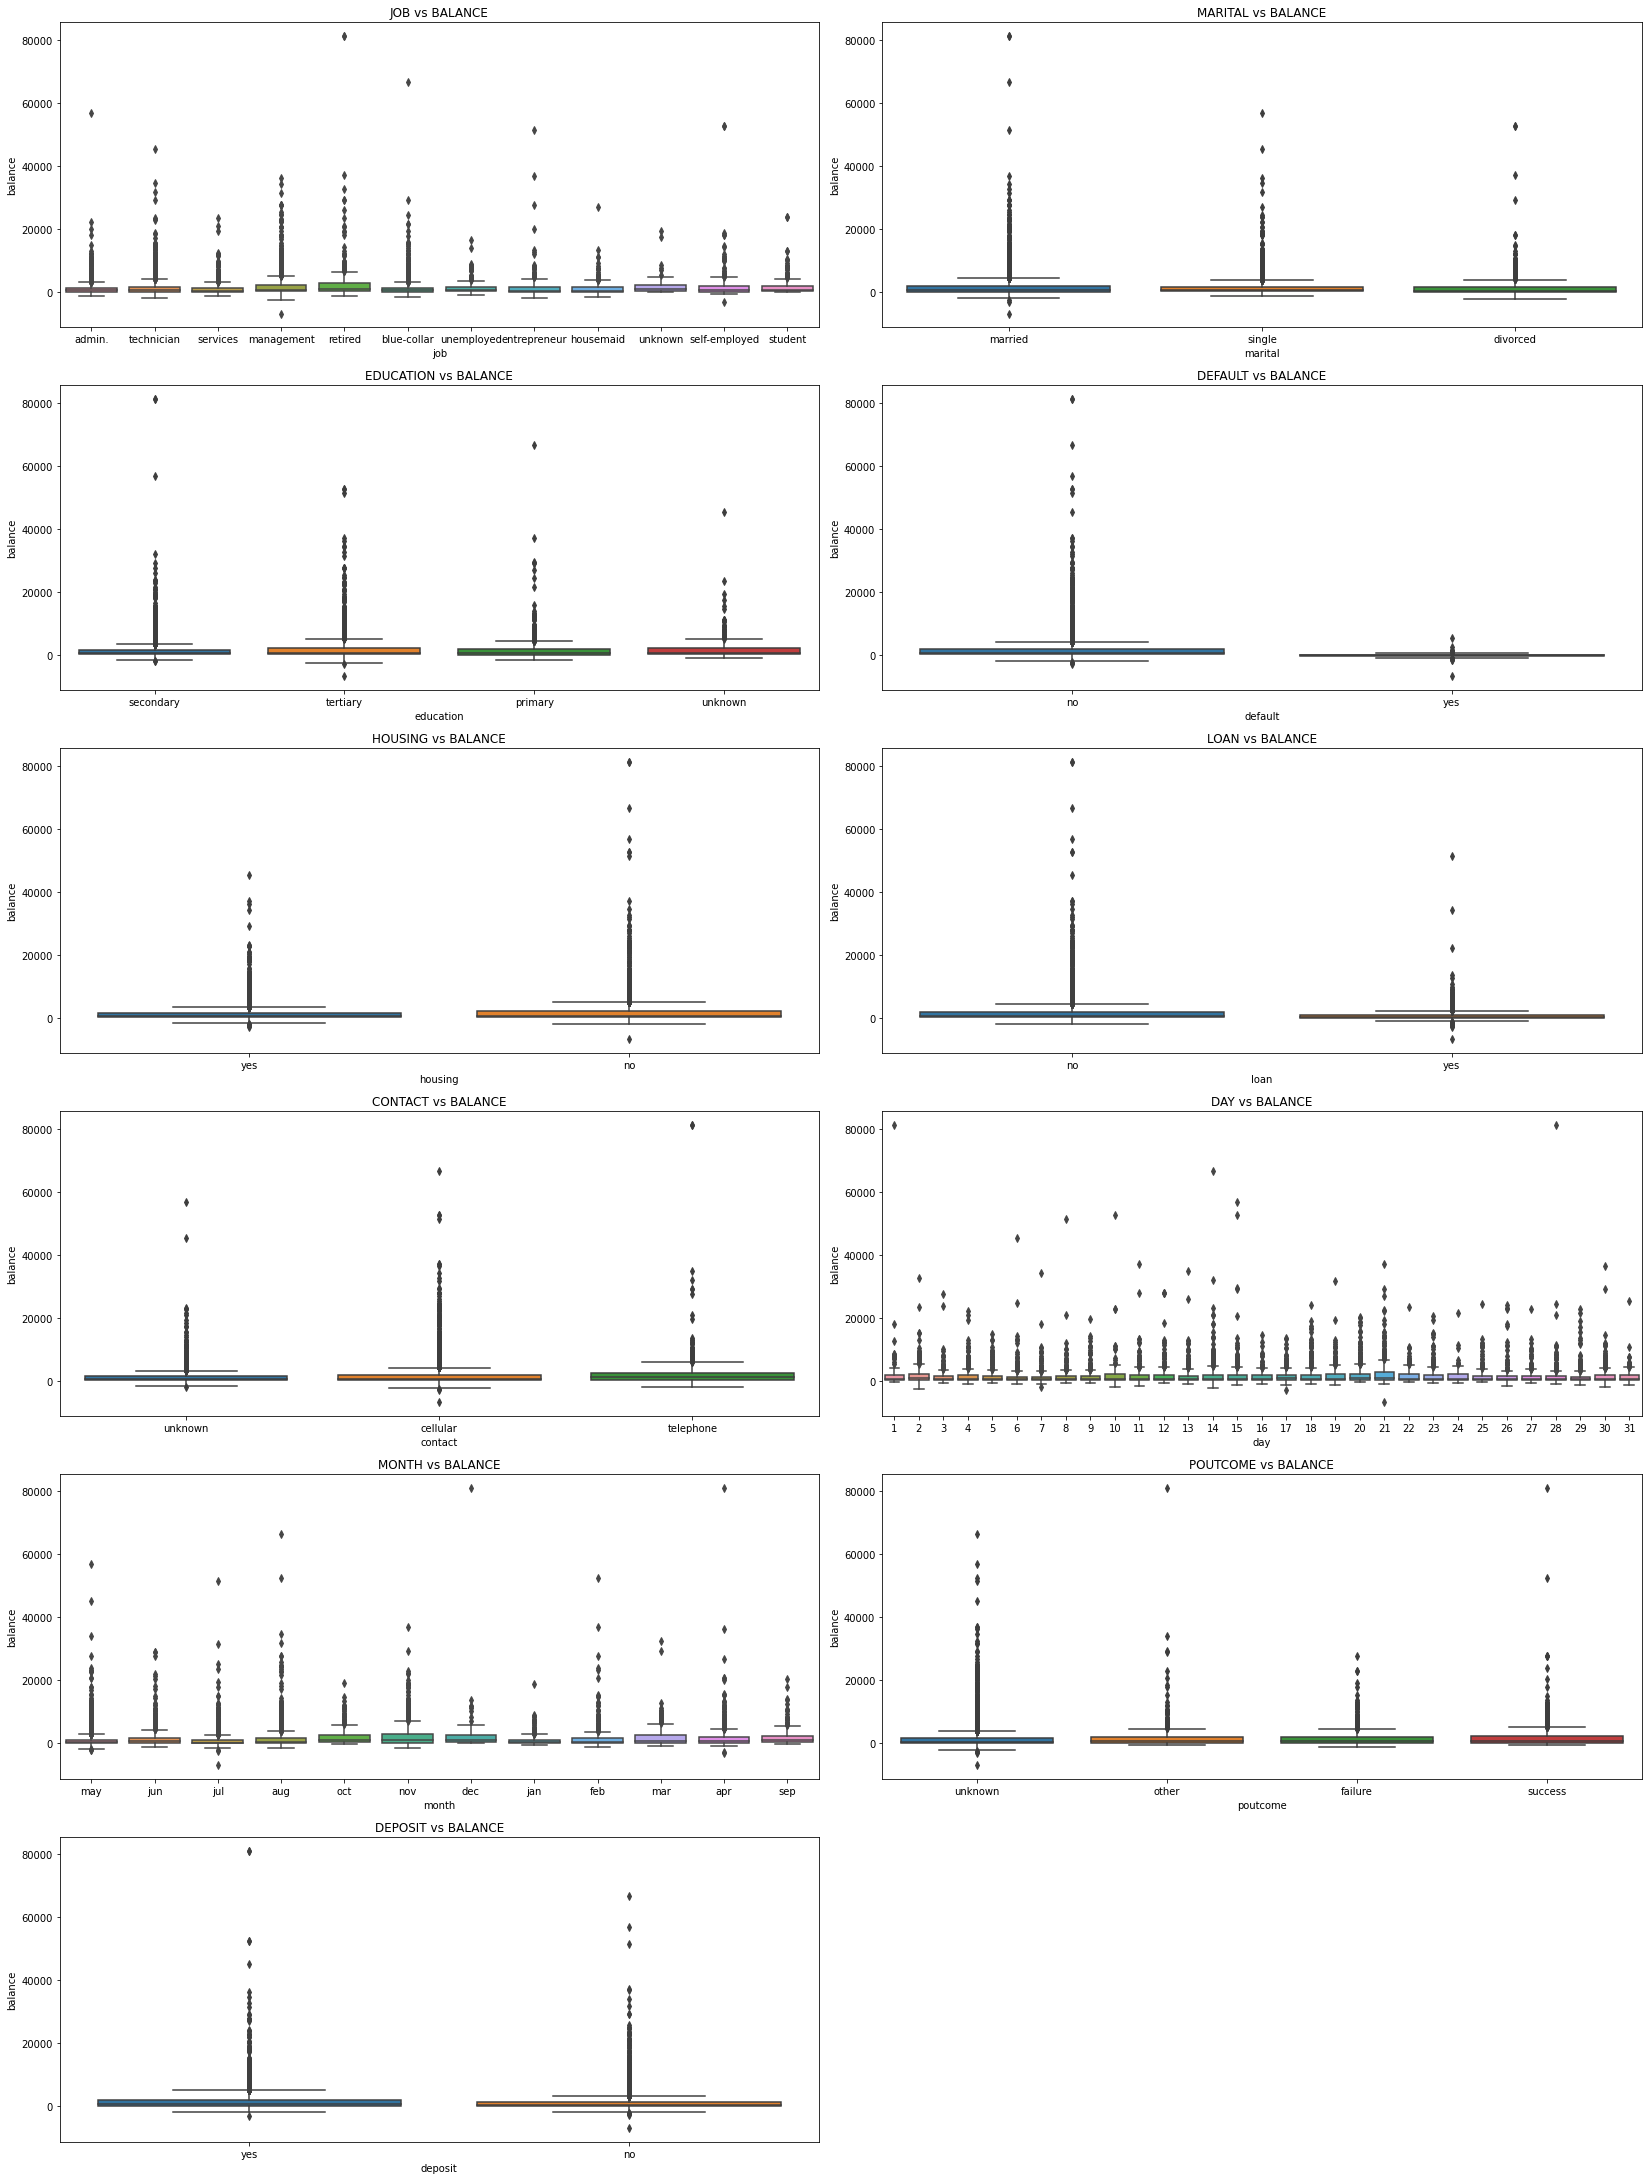

In [21]:
deleted_balance = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list3 = [ele for ele in df.columns if ele not in deleted_balance]

balance_to_cat = df[list3]
balance_to_cat['balance'] = df['balance']

 # balance vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(balance_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=balance_to_cat, x=balance_to_cat.columns[i], y = 'balance')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(balance_to_cat.columns[i].upper()+' vs BALANCE')
plt.tight_layout()

## Duration

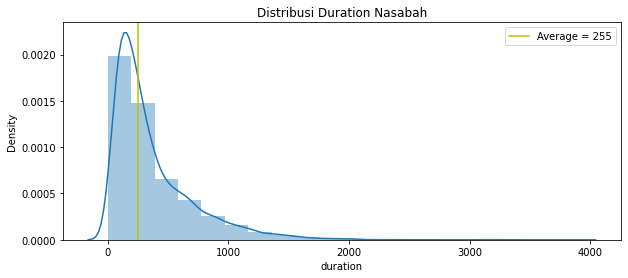

In [22]:
plt.figure(figsize=(10,4))
sns.distplot(df.duration,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['duration'].median(), label='Average = {}'.format(round(df['duration'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi Duration Nasabah')
plt.legend();

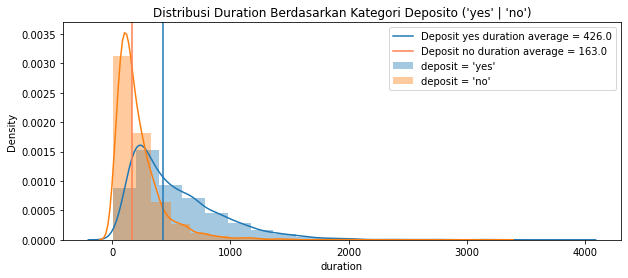

In [23]:
duration_deposit_yes = df['deposit'] == 'yes'
duration_deposit_yes = df.loc[duration_deposit_yes]
duration_deposit_no = df['deposit'] == 'no'
duration_deposit_no = df.loc[duration_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(duration_deposit_yes.duration, bins=20,label="deposit = 'yes'")
sns.distplot(duration_deposit_no.duration, bins = 20,label="deposit = 'no'")
plt.axvline(duration_deposit_yes.duration.median(),label='Deposit yes duration average = {}'.format(round(duration_deposit_yes.duration.median(),3)))
plt.axvline(duration_deposit_no.duration.median(),label='Deposit no duration average = {}'.format(round(duration_deposit_no.duration.median(),3)),c='coral')
plt.title("Distribusi Duration Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



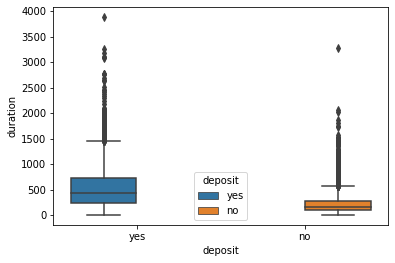

In [24]:
sns.boxplot(data=df, x = 'deposit', y = 'duration', hue='deposit');

### Duration vs Variabel-Variabel Kategorik

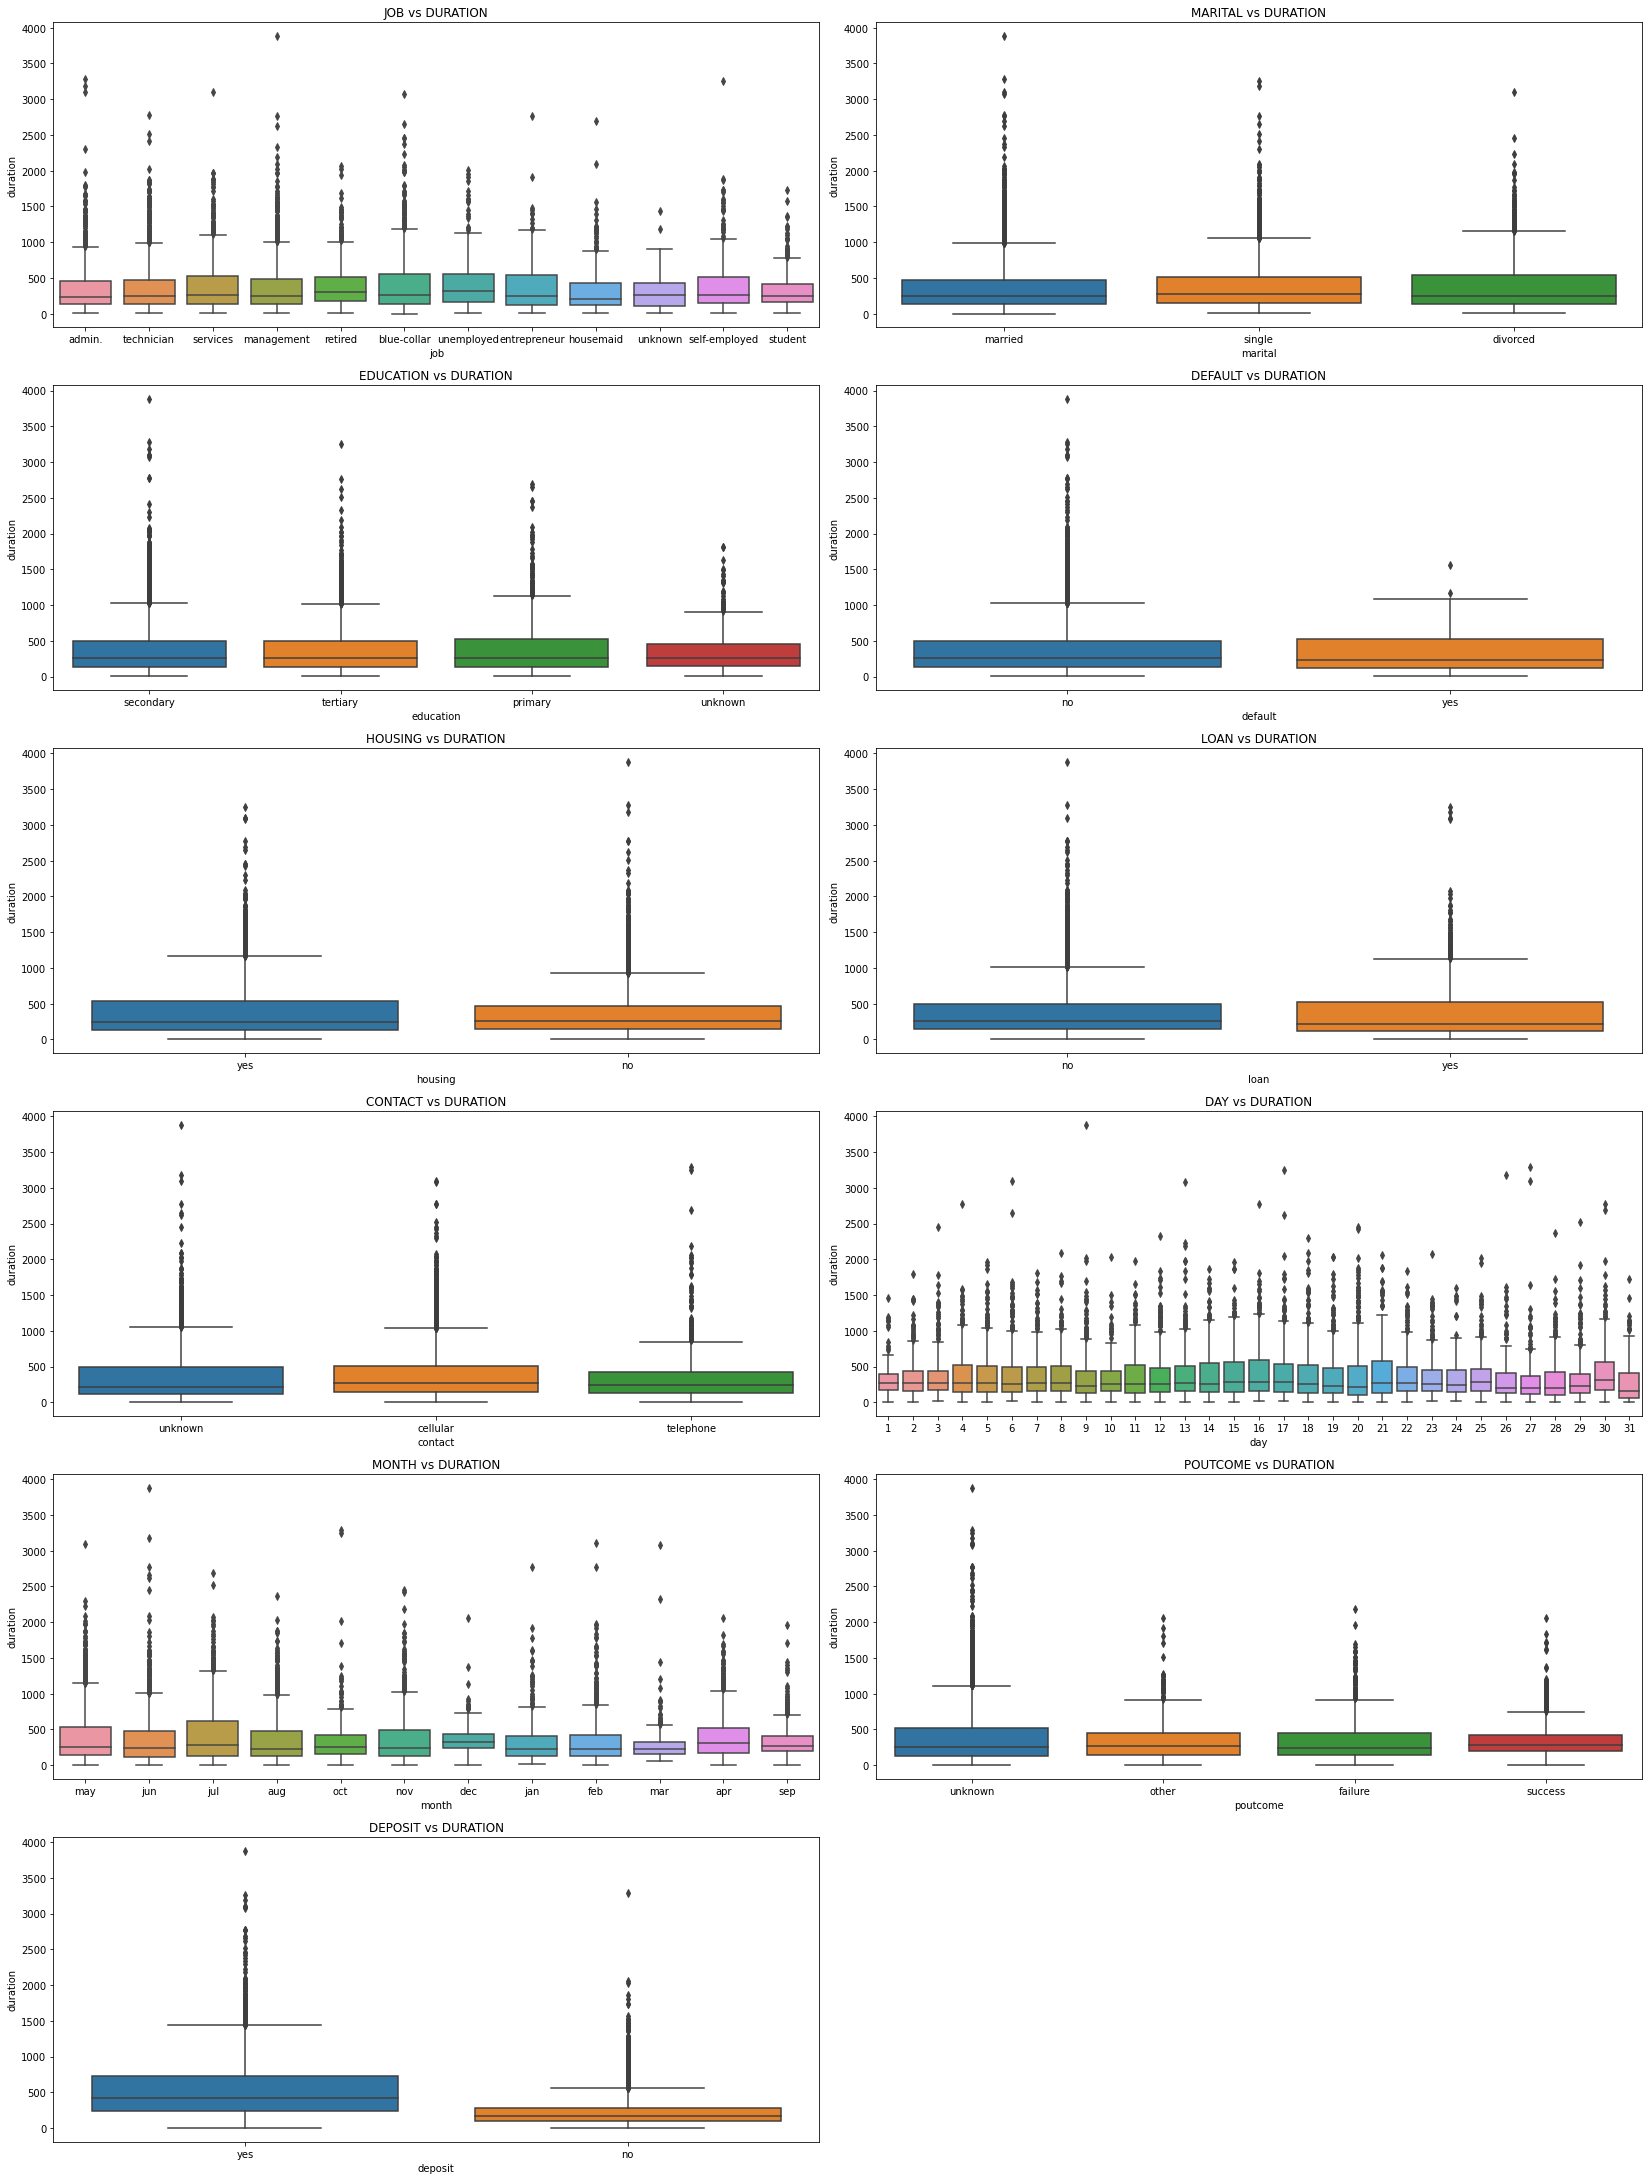

In [25]:
deleted_duration = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list4 = [ele for ele in df.columns if ele not in deleted_duration]

duration_to_cat = df[list4]
duration_to_cat['duration'] = df['duration']

 # duration vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(duration_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=duration_to_cat, x=duration_to_cat.columns[i], y = 'duration')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(duration_to_cat.columns[i].upper()+' vs DURATION')
plt.tight_layout()

## Pdays

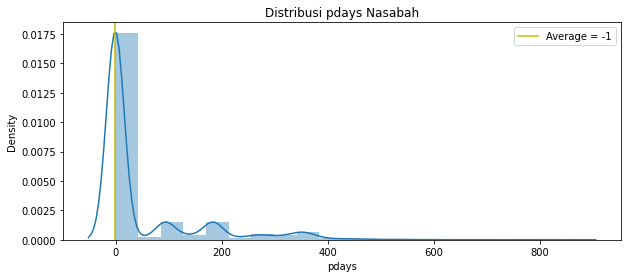

In [26]:
plt.figure(figsize=(10,4))
sns.distplot(df.pdays,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['pdays'].median(), label='Average = {}'.format(round(df['pdays'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi pdays Nasabah')
plt.legend();

In [27]:
df.pdays.max()

854

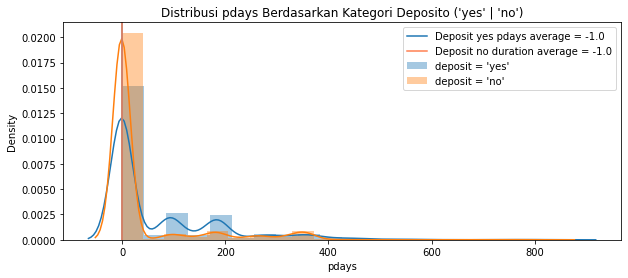

In [28]:
pdays_deposit_yes = df['deposit'] == 'yes'
pdays_deposit_yes = df.loc[pdays_deposit_yes]
pdays_deposit_no = df['deposit'] == 'no'
pdays_deposit_no = df.loc[pdays_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(pdays_deposit_yes.pdays, bins=20,label="deposit = 'yes'")
sns.distplot(pdays_deposit_no.pdays, bins = 20,label="deposit = 'no'")
plt.axvline(pdays_deposit_yes.pdays.median(),label='Deposit yes pdays average = {}'.format(round(pdays_deposit_yes.pdays.median(),3)))
plt.axvline(pdays_deposit_no.pdays.median(),label='Deposit no duration average = {}'.format(round(pdays_deposit_no.pdays.median(),3)),c='coral')
plt.title("Distribusi pdays Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



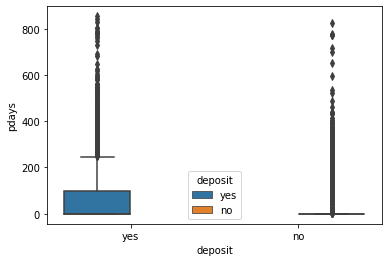

In [29]:
sns.boxplot(data=df, x = 'deposit', y = 'pdays', hue='deposit');

### Pdays vs Variabel-Variabel Kategorik

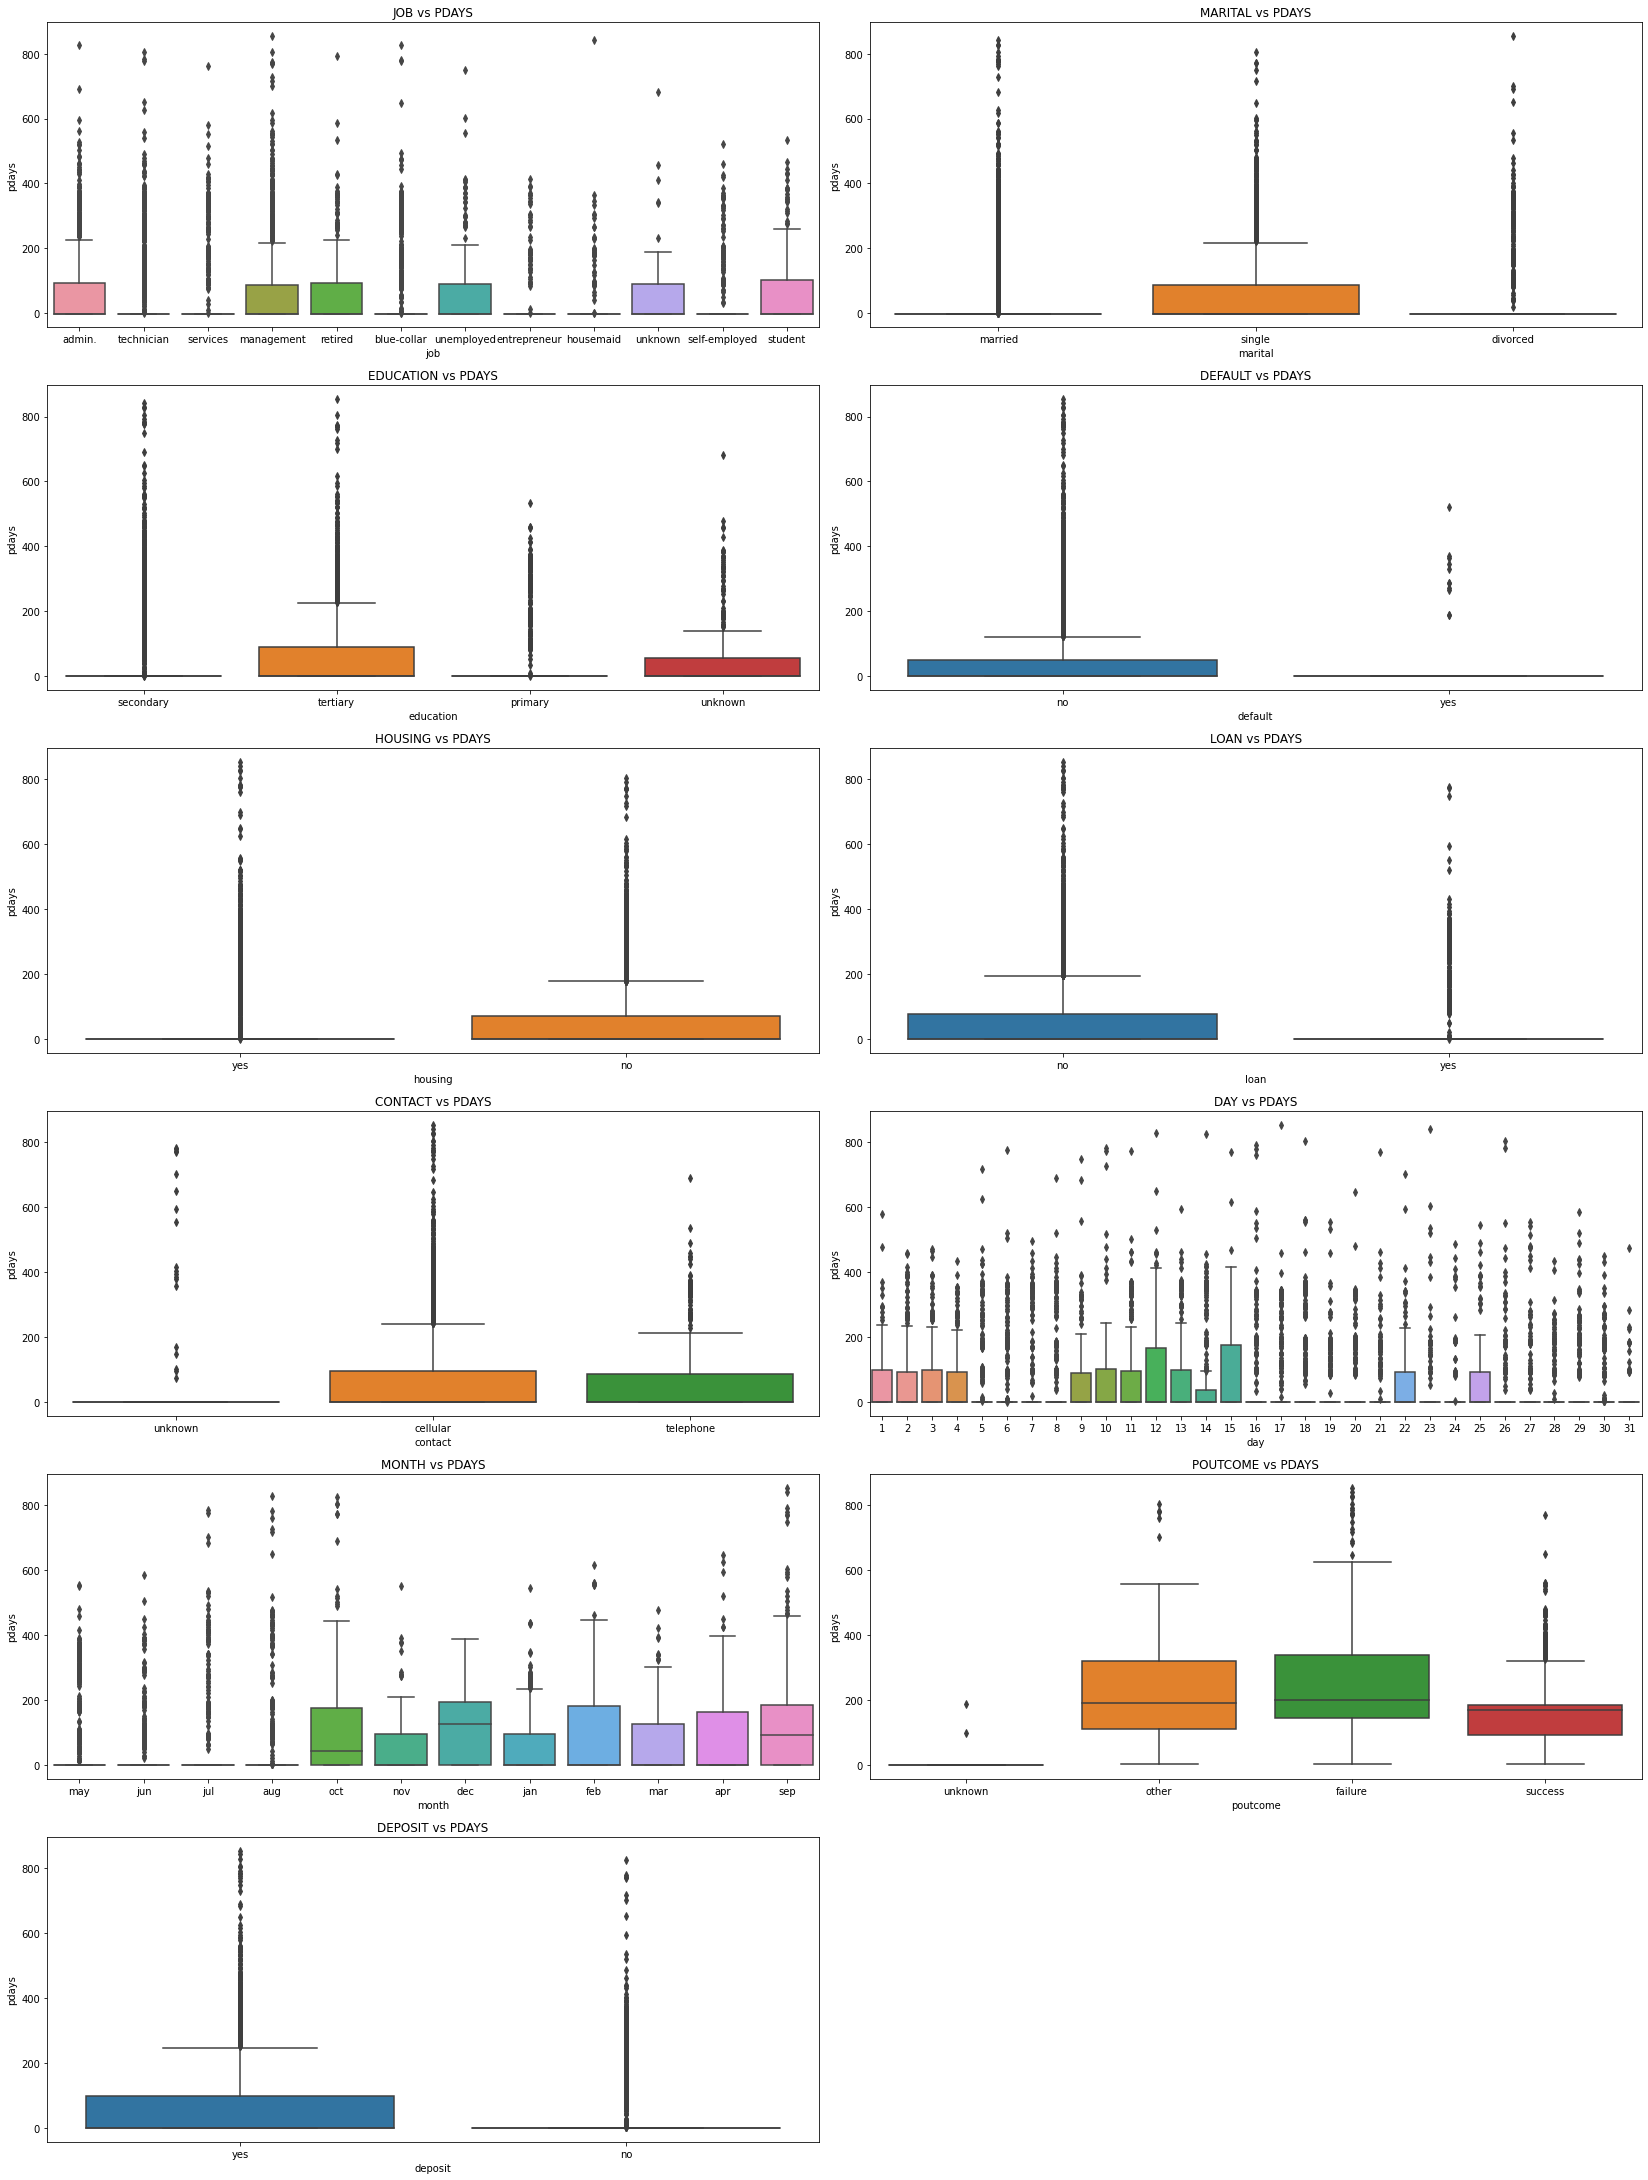

In [30]:
deleted_pdays = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list5 = [ele for ele in df.columns if ele not in deleted_pdays]

pdays_to_cat = df[list5]
pdays_to_cat['pdays'] = df['pdays']

 # pdays vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(pdays_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=pdays_to_cat, x=pdays_to_cat.columns[i], y = 'pdays')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(pdays_to_cat.columns[i].upper()+' vs PDAYS')
plt.tight_layout()

## Previous

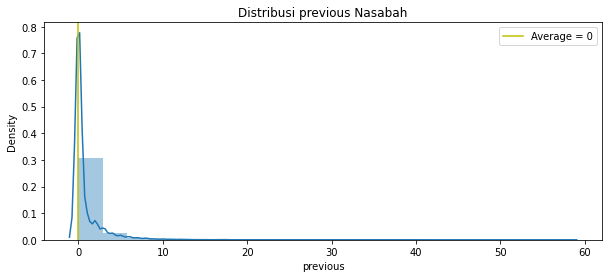

In [31]:
plt.figure(figsize=(10,4))
sns.distplot(df.previous,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['previous'].median(), label='Average = {}'.format(round(df['previous'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi previous Nasabah')
plt.legend();

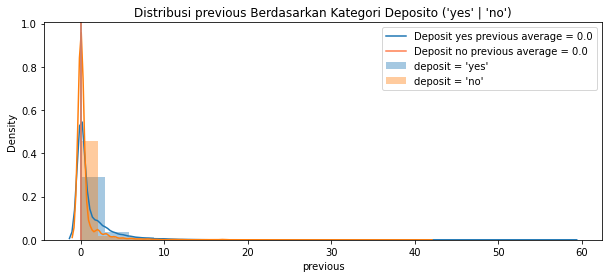

In [32]:
previous_deposit_yes = df['deposit'] == 'yes'
previous_deposit_yes = df.loc[previous_deposit_yes]
previous_deposit_no = df['deposit'] == 'no'
previous_deposit_no = df.loc[previous_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(previous_deposit_yes.previous, bins=20,label="deposit = 'yes'")
sns.distplot(previous_deposit_no.previous, bins = 20,label="deposit = 'no'")
plt.axvline(previous_deposit_yes.previous.median(),label='Deposit yes previous average = {}'.format(round(previous_deposit_yes.previous.median(),3)))
plt.axvline(previous_deposit_no.previous.median(),label='Deposit no previous average = {}'.format(round(previous_deposit_no.previous.median(),3)),c='coral')
plt.title("Distribusi previous Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



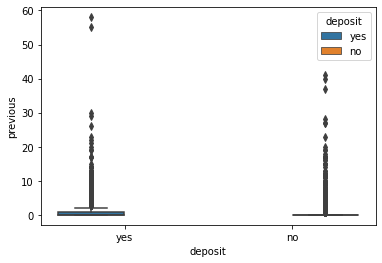

In [33]:
sns.boxplot(data=df, x = 'deposit', y = 'previous', hue='deposit');

### Previous vs Variabel-Variabel Kategorik

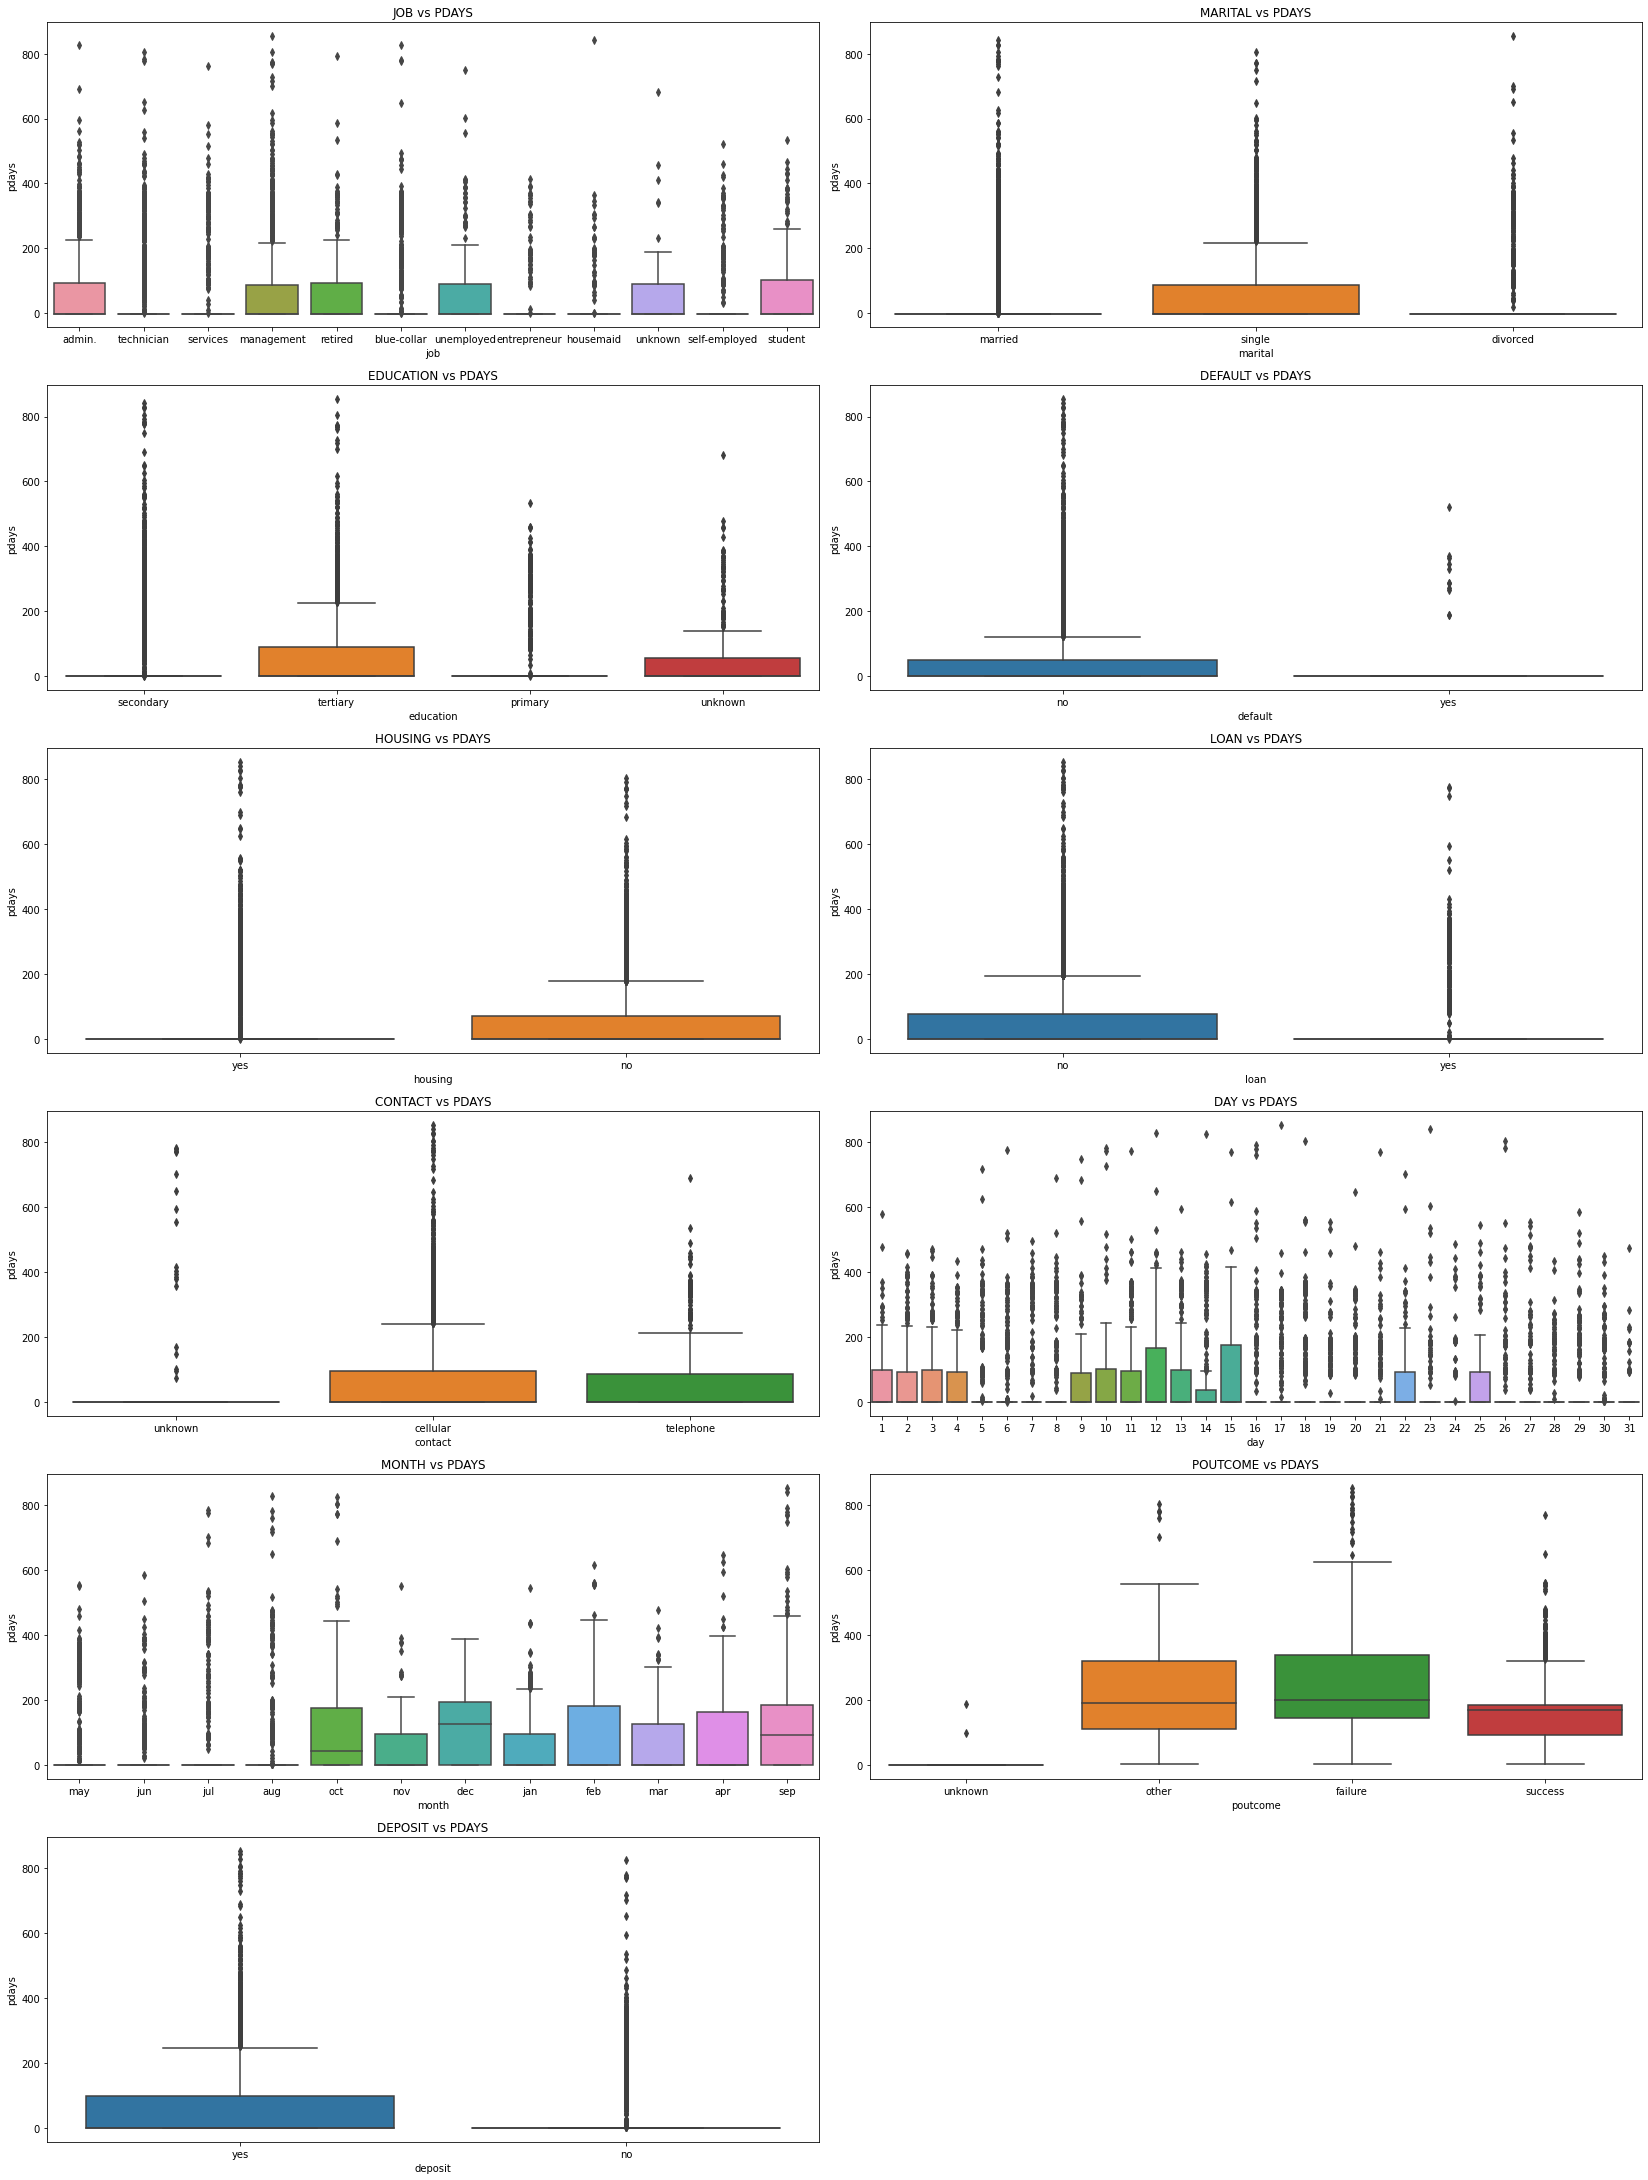

In [34]:
deleted_previous = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list6 = [ele for ele in df.columns if ele not in deleted_pdays]

pdays_to_cat = df[list5]
pdays_to_cat['pdays'] = df['pdays']

 # Previous vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(pdays_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=pdays_to_cat, x=pdays_to_cat.columns[i], y = 'pdays')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(pdays_to_cat.columns[i].upper()+' vs PDAYS')
plt.tight_layout()

## Campaign

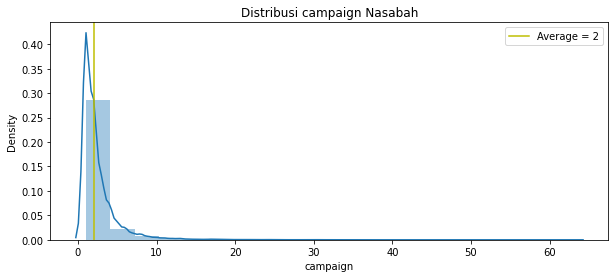

In [35]:
plt.figure(figsize=(10,4))
sns.distplot(df.campaign,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['campaign'].median(), label='Average = {}'.format(round(df['campaign'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi campaign Nasabah')
plt.legend();

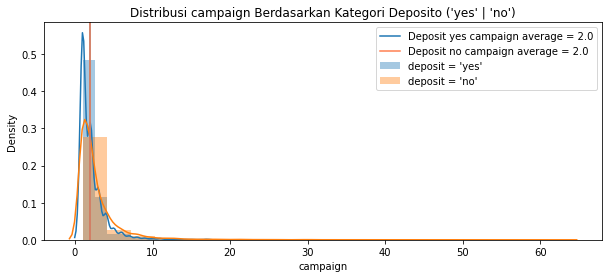

In [36]:
campaign_deposit_yes = df['deposit'] == 'yes'
campaign_deposit_yes = df.loc[campaign_deposit_yes]
campaign_deposit_no = df['deposit'] == 'no'
campaign_deposit_no = df.loc[campaign_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(campaign_deposit_yes.campaign, bins=20,label="deposit = 'yes'")
sns.distplot(campaign_deposit_no.campaign, bins = 20,label="deposit = 'no'")
plt.axvline(campaign_deposit_yes.campaign.median(),label='Deposit yes campaign average = {}'.format(round(campaign_deposit_yes.campaign.median(),3)))
plt.axvline(campaign_deposit_no.campaign.median(),label='Deposit no campaign average = {}'.format(round(campaign_deposit_no.campaign.median(),3)),c='coral')
plt.title("Distribusi campaign Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



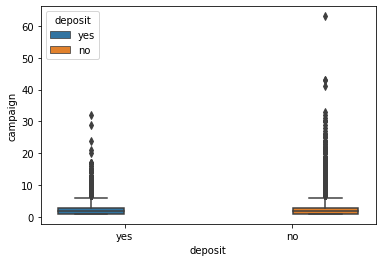

In [37]:
sns.boxplot(data=df, x = 'deposit', y = 'campaign', hue='deposit');

### Campaign Variabel-Variabel Kategorik

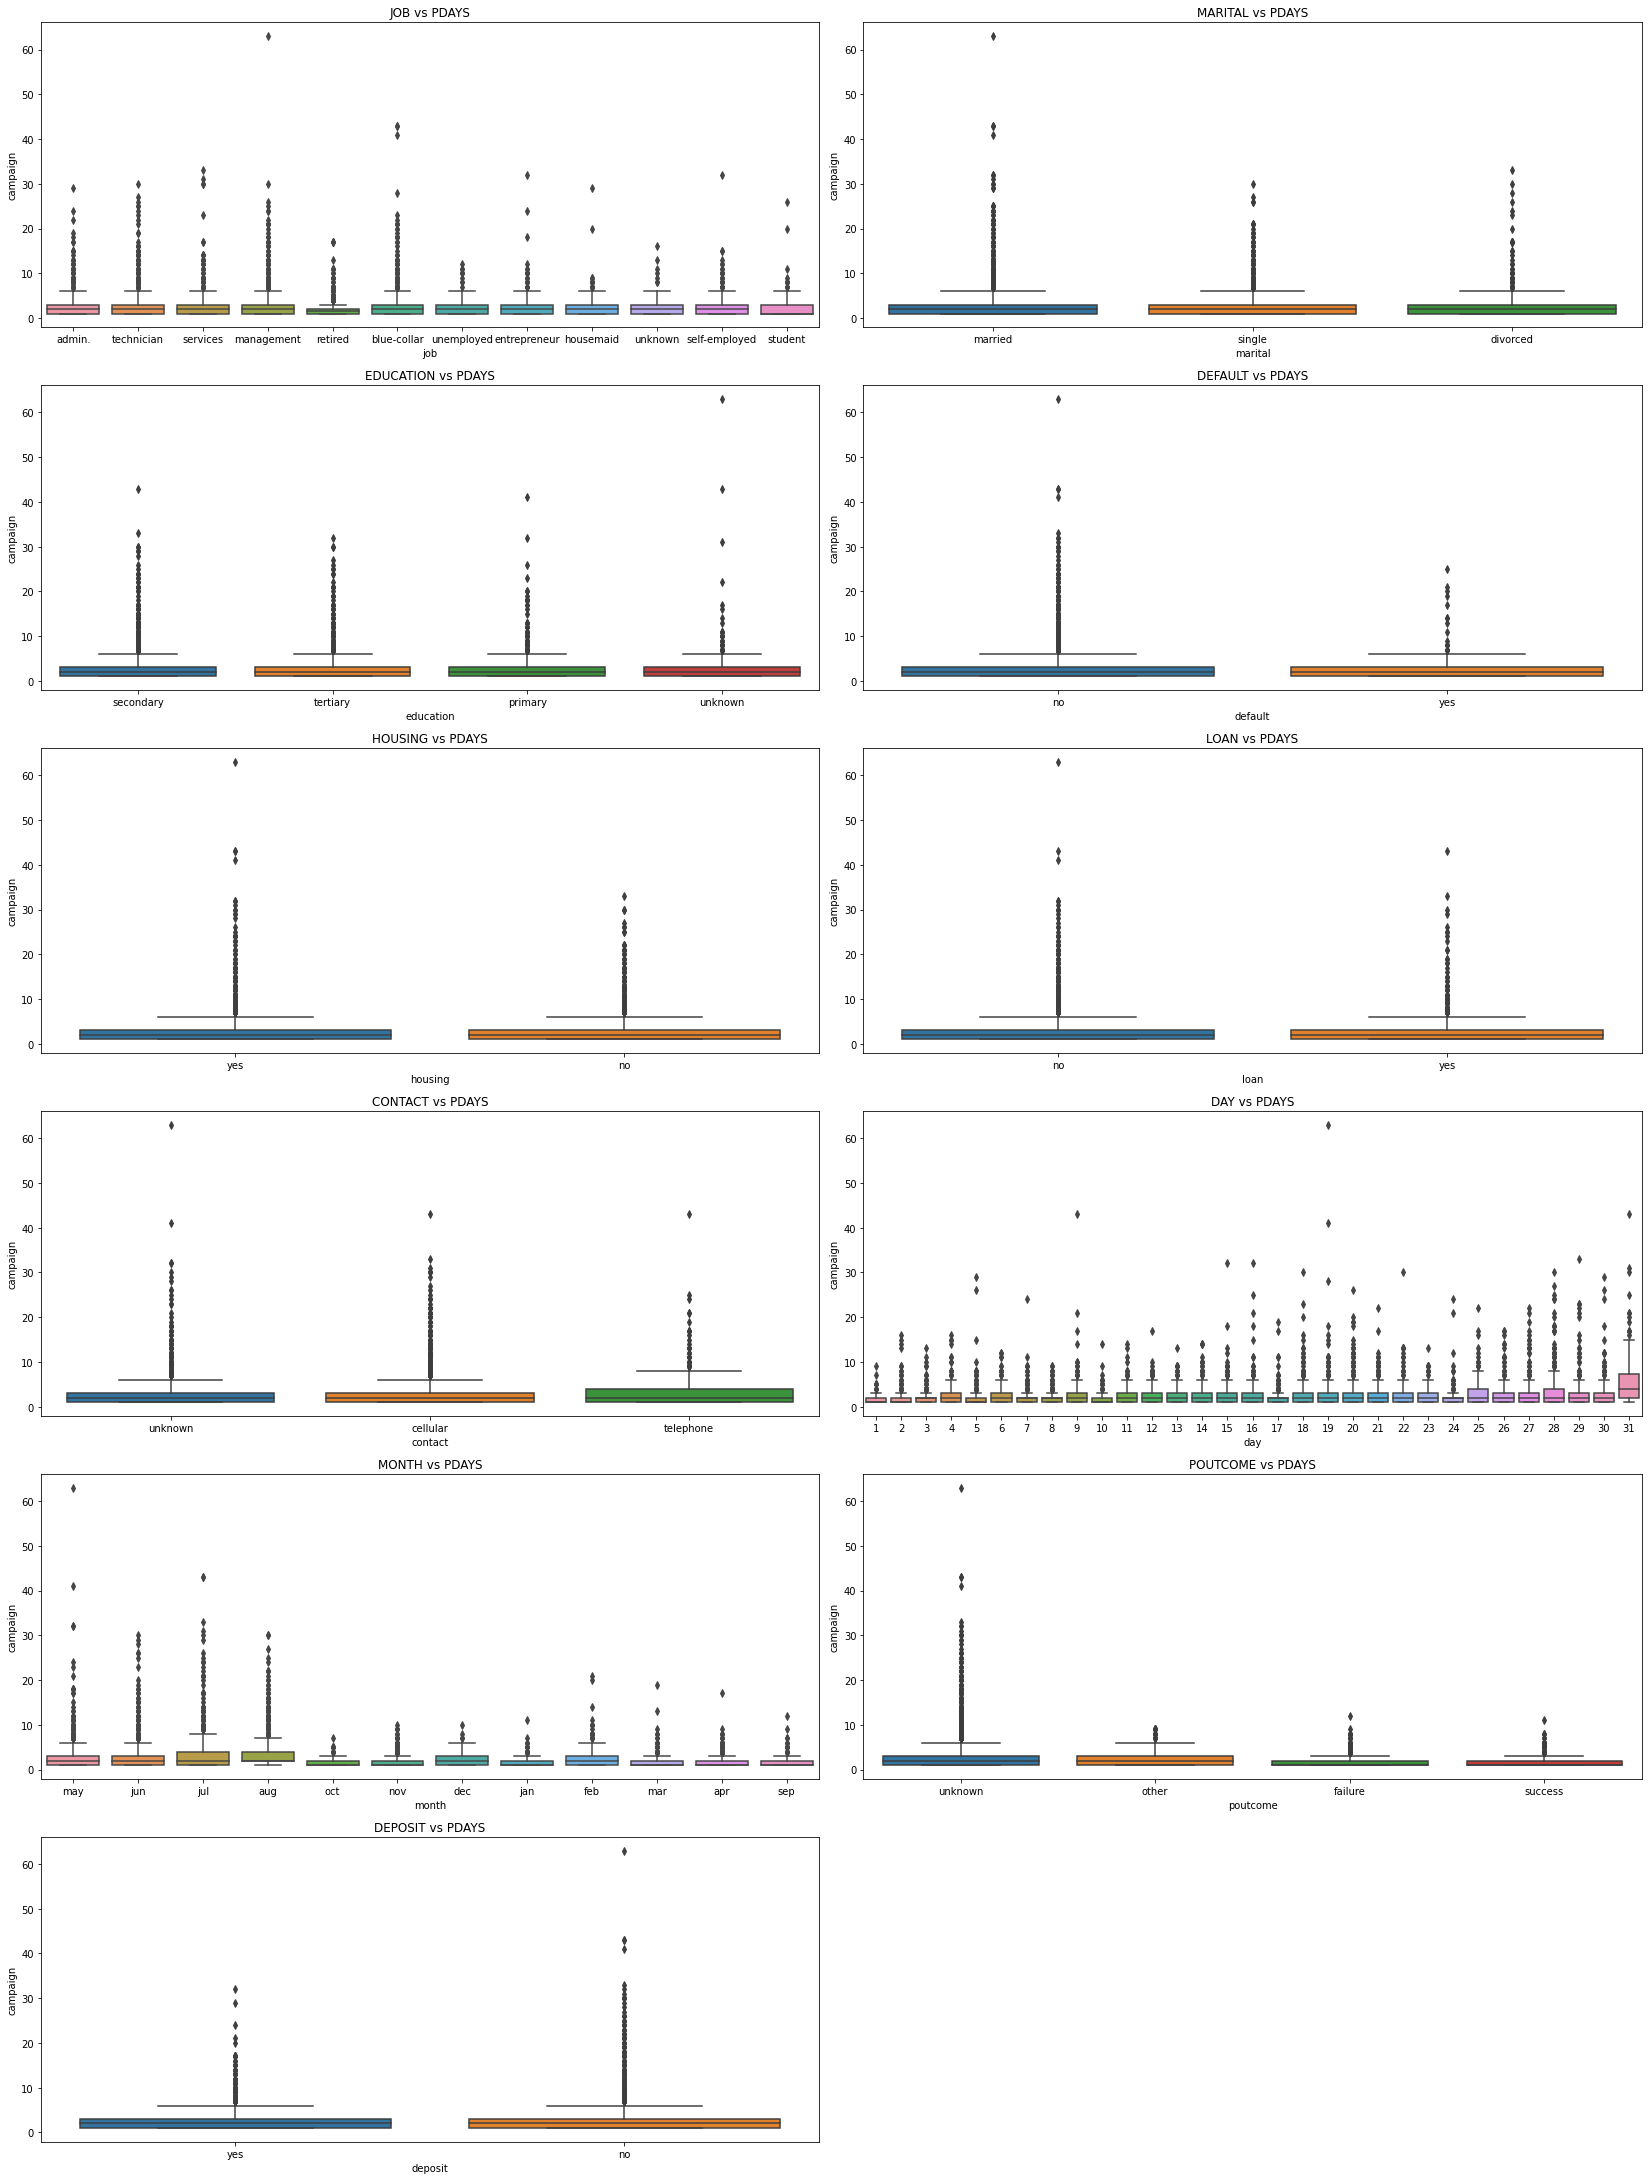

In [38]:
deleted_campaign = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list7 = [ele for ele in df.columns if ele not in deleted_campaign]

campaign_to_cat = df[list7]
campaign_to_cat['campaign'] = df['campaign']

 # age vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(campaign_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=campaign_to_cat, x=campaign_to_cat.columns[i], y = 'campaign')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(campaign_to_cat.columns[i].upper()+' vs PDAYS')
plt.tight_layout()

# Features Engineering
Akan dilakukan pemilihan fitur-fitur yang akan dijadikan sebagai parameter dalam membangun model. Dilakukan dengan mendeteksi adayana outlier antar variabel numerik. Setelah itu, outlier tersebut akan disisihkan. 

In [39]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [40]:
deleted_out = {'day'}
list8 = [ele for ele in df.columns if ele not in deleted_out]

In [41]:
df_out = df[list8]
#df_out['campaign'] = df['campaign']
df_out.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

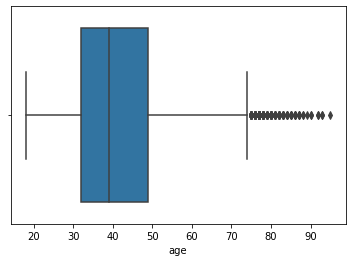

In [42]:
sns.boxplot(df['age']);

In [43]:
df_new = df.copy()

### Age

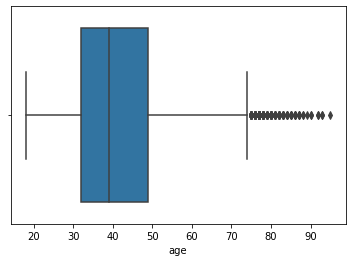

In [44]:
sns.boxplot(df_new['age']);

In [45]:
df_new["age"] = np.where(df_new["age"] <df_new['age'].quantile(0.10), df_new['age'].quantile(0.10),df_new['age'])
df_new["age"] = np.where(df_new["age"] >df_new['age'].quantile(0.90), df_new['age'].quantile(0.90),df_new['age'])
print(df_new['age'].skew())

0.4123928651128603


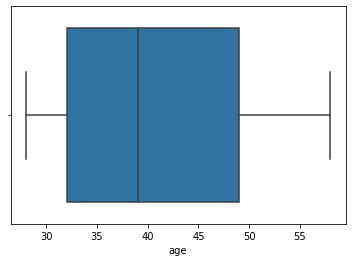

In [46]:
sns.boxplot(df_new['age']);

### Balance

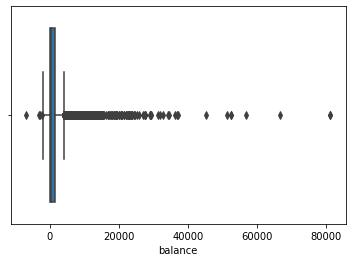

In [47]:
sns.boxplot(df_new['balance']);

In [48]:
df_new["balance"] = np.where(df_new["balance"] <df_new['balance'].quantile(0.10), df_new['balance'].quantile(0.10),df_new['balance'])
df_new["balance"] = np.where(df_new["balance"] >df_new['balance'].quantile(0.90), df_new['balance'].quantile(0.90),df_new['balance'])
print(df_new['balance'].skew())

1.142247974036395


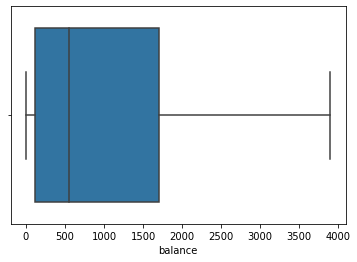

In [49]:
sns.boxplot(df_new['balance']);

### Duration

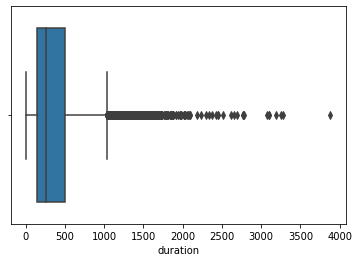

In [50]:
sns.boxplot(df_new['duration']);

In [51]:
df_new["duration"] = np.where(df_new["duration"] <df_new['duration'].quantile(0.10), df_new['duration'].quantile(0.10),df_new['duration'])
df_new["duration"] = np.where(df_new["duration"] >df_new['duration'].quantile(0.90), df_new['duration'].quantile(0.90),df_new['duration'])
print(df_new['duration'].skew())

0.8506119184251896


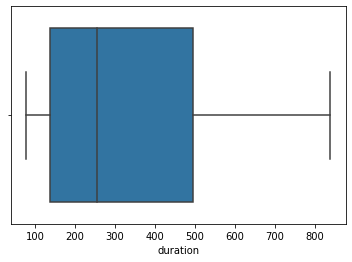

In [52]:
sns.boxplot(df_new['duration']);

### Pdays

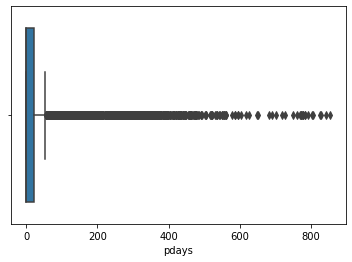

In [53]:
sns.boxplot(df_new['pdays']);

In [54]:
df_new["pdays"] = np.where(df_new["pdays"] <df_new['pdays'].quantile(0.10), df_new['pdays'].quantile(0.10),df_new['pdays'])
df_new["pdays"] = np.where(df_new["pdays"] >df_new['pdays'].quantile(0.90), df_new['pdays'].quantile(0.90),df_new['pdays'])
print(df_new['pdays'].skew())

1.4344713357254215


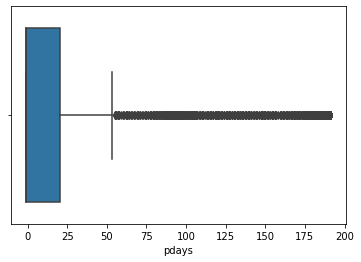

In [55]:
sns.boxplot(df_new['pdays']);

### Previous

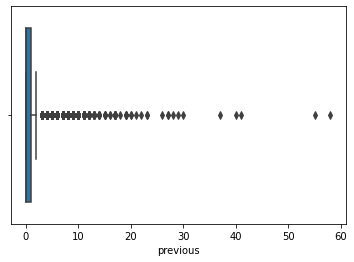

In [56]:
sns.boxplot(df_new['previous']);

In [57]:
df_new["previous"] = np.where(df_new["previous"] <df_new['previous'].quantile(0.10), df_new['previous'].quantile(0.10),df_new['previous'])
df_new["previous"] = np.where(df_new["previous"] >df_new['previous'].quantile(0.90), df_new['previous'].quantile(0.90),df_new['previous'])
print(df_new['previous'].skew())

1.635296161472558


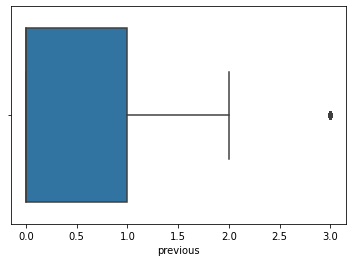

In [58]:
sns.boxplot(df_new['previous']);

### Campaign

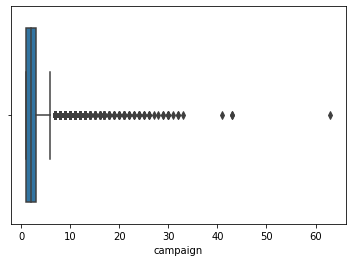

In [59]:
sns.boxplot(df_new['campaign']);

In [60]:
df_new["campaign"] = np.where(df_new["campaign"] <df_new['campaign'].quantile(0.10), df_new['campaign'].quantile(0.10),df_new['campaign'])
df_new["campaign"] = np.where(df_new["campaign"] >df_new['campaign'].quantile(0.90), df_new['campaign'].quantile(0.90),df_new['campaign'])
print(df_new['campaign'].skew())

0.9826361461567283


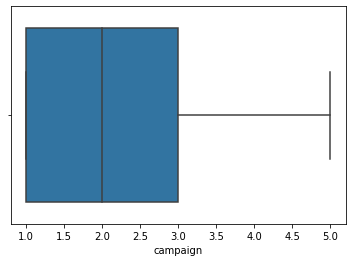

In [61]:
sns.boxplot(df_new['campaign']);

## Drop Kolom/Fitur

`pdays`, dan `previous` didrop karena masih terdapat *outlier* pada fitur tersebut dan juga miliki hubungan korelasi yang lemah dengan fitur-fitur numerik yang lain. `month` dan `day` didrop karena berpotensi menghasilkan masalah *data leakage* pada saat membagi data training dan testing sehingga menimbulkan *overfitting*.

In [62]:
df_new.drop(['pdays','previous','month','day'], axis=1,inplace=True)

In [63]:
df_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'poutcome', 'deposit'],
      dtype='object')

## OneHotEncoder pada Variabel-Variabel Kategorik

Agar dapat diproses ke dalam machine learning, variabel-variabel kategorik harus diubah ke dalam bentuk numerik.

In [64]:
df_new2 = df_new.copy()

### job

In [65]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_new2[['job', 'marital', 'education', 'default','housing','loan','contact','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'])

# Replace Categotical Data with Encoded Data
df_new2.drop(['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_new2, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,balance,duration,campaign,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2343.0,838.0,1.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56.0,45.0,838.0,1.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,838.0,1.0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,579.0,1.0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54.0,184.0,673.0,2.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1.0,257.0,1.0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39.0,733.0,83.0,4.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32.0,29.0,156.0,2.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43.0,0.0,77.0,2.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
dep = df_new2['deposit'].map({'yes':1, 'no':0})

In [67]:
df_encoded.drop('deposit',axis=1)

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2343.0,838.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56.0,45.0,838.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,838.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,579.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54.0,184.0,673.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1.0,257.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39.0,733.0,83.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32.0,29.0,156.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43.0,0.0,77.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
df_encoded['deposit'] = dep

In [69]:
df_encoded

,age,balance,duration,campaign,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2343.0,838.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56.0,45.0,838.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,838.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,579.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54.0,184.0,673.0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1.0,257.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39.0,733.0,83.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32.0,29.0,156.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43.0,0.0,77.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('deposit',axis=1)
y = df_encoded['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Decision Tree 

## Training Model

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediksi X_test

In [72]:
predictions = dtree.predict(X_test)

In [73]:
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
8096,0,1
8180,0,0
1387,1,1
3047,1,1
4670,1,1
...,...,...
9252,0,0
3197,1,1
4335,1,1
5417,0,0


## Evaluasi Model

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1761
           1       0.72      0.72      0.72      1588

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349



Akurasi baik dipakai ketika proporsi fitur target (deposit) sama. Akan tetapi, di dataset tidak sama. Oleh karena itu metrics yang akan digunakan untuk menyatakan sebagai parameter seberapa bagus model yang dihasilkan adalah f1-score. F1-score akan digunakan sebagai parameter utama untuk menentukan keakuratan model yang dibuat ke metode-metode berukutnya. F1-score merupakan harmonic mean antara precision dan recall. Semakin mendekati angka 1, maka model yang dihasilkan untuk memprediksi suatu kelas juga makin bagus.

Decision tree lebih baik 0.02 dalam memprediksi kelas 0 dibanding dengan pada kelas 1. Pada kelas 0, f1-score = 0.75. Kelas 1 sebesar 0.73.

### Confusion Matrix

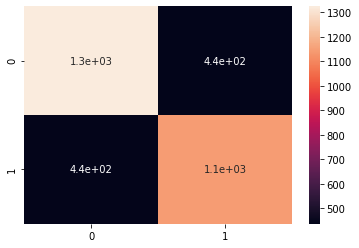

In [76]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True);

Dengan tuple unpacking, ekstrak tn, fp, fn, dan tp:

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

print('False Positive = ', fp)
print('False Negative = ', fn)
print('True Positive = ', tp)
print('True Negative = ', tn)

False Positive =  436
False Negative =  441
True Positive =  1147
True Negative =  1325


Confusion matrix di atas menunjukkan bahwa 436 item berada pada error type 1 (False Positif) yang menandakan bahwa model menghasilkan prediksi kelas 0 (no) yang sebenarnya adalah kelas 1 (yes).

Kemudian sebanyak 441 item berada pada error type 2 (False Negative). Menunjukkan bahwa model menghasilkan klasifikasi ke kelas 0 (no), yang sebenarnya adalah kelas 1 (yes).

Sisaya untuk nilai nilai TP dan TN, merupakan hasil-hasil prediksi benar. Model memprediksi deposit yes yang sebenarnya deposit yes, atau model memprediksi deposit no, tetapi sebenarnya memang deposit no.

### ROC Curve

ROC curve menunjukkan trade-off antara sensivity (True Positive Rate) dan specivity (1-False Positive Rate). Semakin kurva melengkung ke arah kiri atas, maka semakin baik pula model yang dihasilkan. Hasilnya, akan meninggalkan *area under curve* (auc) yang akan semakin besar. Berlaku pula sebaliknya jika menghasilkan model yang buruk.

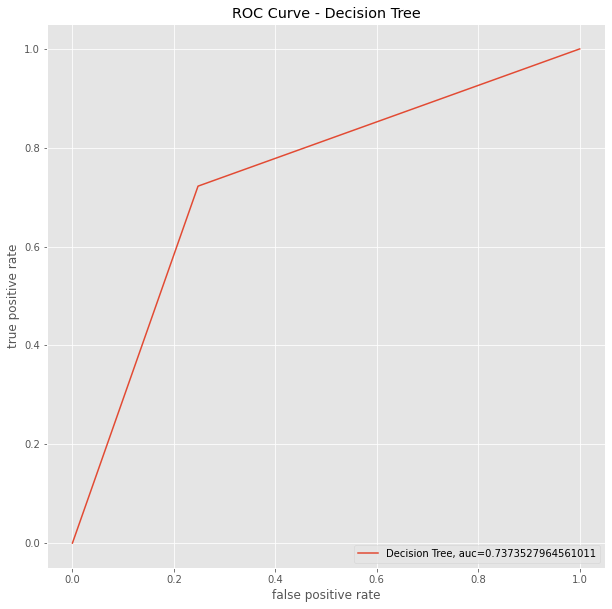

In [79]:
# Import Visualization Package
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtree.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Random Forest

## Training Model

In [80]:
from sklearn.ensemble import RandomForestClassifier

Random Forest merupakan metode *machine learning* yang berupa gabungan dari banyak *decision tree*. Akan di-*set* sebanyak 600 buah *decision tree* dalam *classifier* ini.

In [81]:
rfc = RandomForestClassifier(600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediksi X_test

In [82]:
predictions = rfc.predict(X_test)

In [83]:
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
8096,0,1
8180,0,0
1387,1,1
3047,1,1
4670,1,1
...,...,...
9252,0,0
3197,1,1
4335,1,1
5417,0,0


## Evaluasi Model

### Classification Report

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1761
           1       0.78      0.83      0.81      1588

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



### Confusion Matrix

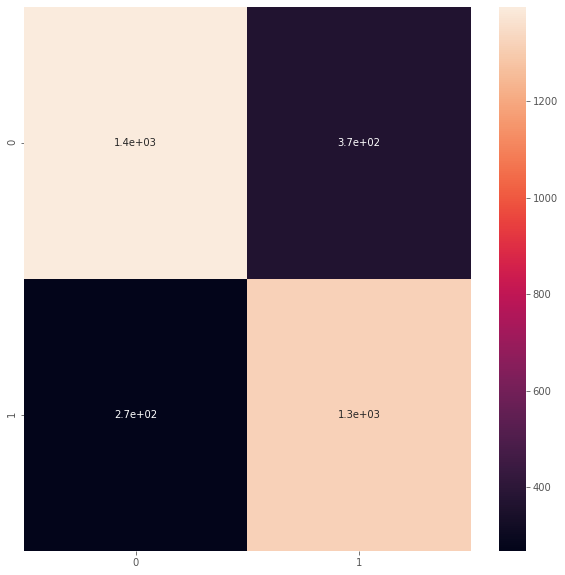

In [85]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True);

In [86]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

print('False Positive = ', fp)
print('False Negative = ', fn)
print('True Positive = ', tp)
print('True Negative = ', tn)

False Positive =  366
False Negative =  268
True Positive =  1320
True Negative =  1395


### ROC Curve

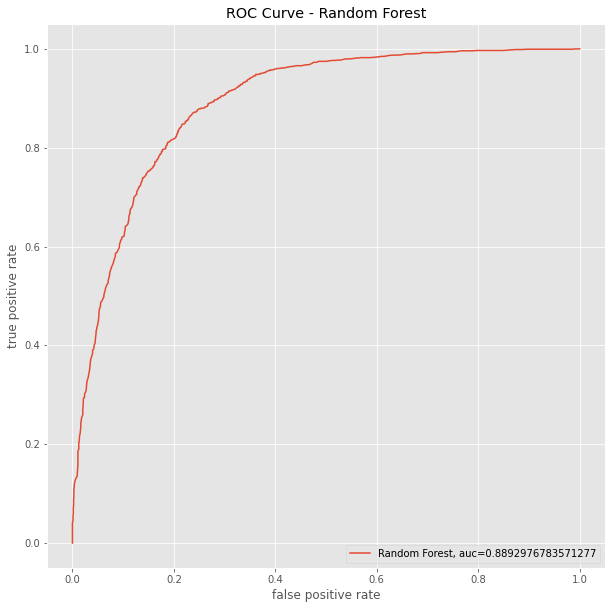

In [87]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_rfc_proba = rfc.predict_proba(X_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

## Training Model

In [91]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediksi X_test

In [92]:
predictions = logmodel.predict(X_test)
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
8096,0,1
8180,0,0
1387,1,1
3047,1,1
4670,1,1
...,...,...
9252,0,0
3197,1,1
4335,1,0
5417,0,0


## Evaluasi Model

### Classification Report

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1761
           1       0.82      0.77      0.80      1588

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



### Confusion Matrix

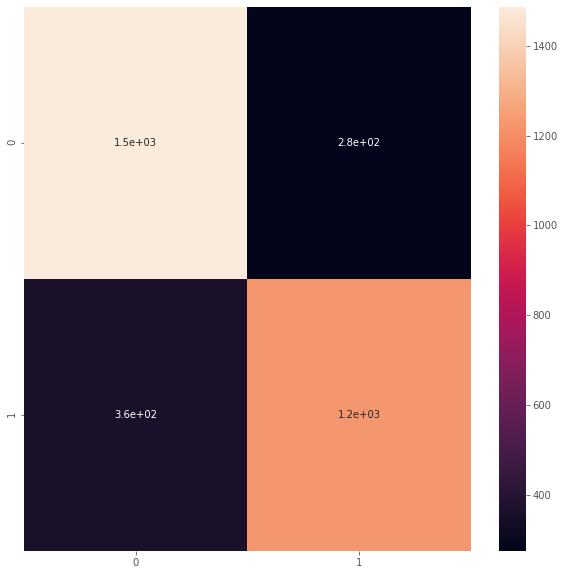

In [94]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True);

In [95]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

print('False Positive = ', fp)
print('False Negative = ', fn)
print('True Positive = ', tp)
print('True Negative = ', tn)

False Positive =  275
False Negative =  358
True Positive =  1230
True Negative =  1486


### ROC Curve

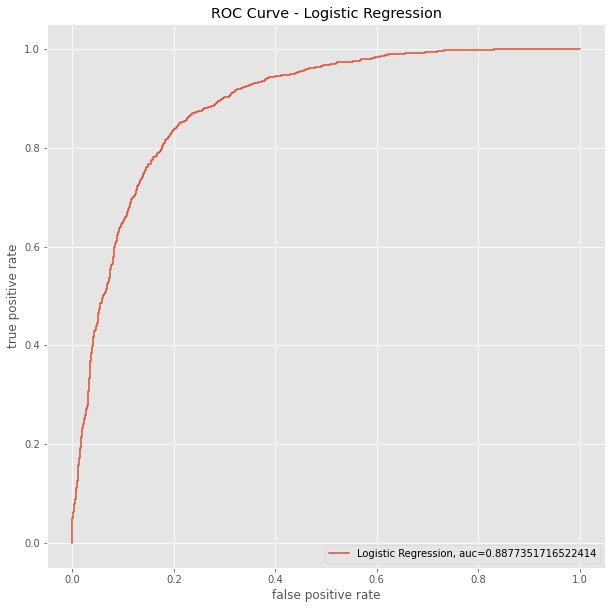

In [96]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_logmodel_proba = logmodel.predict_proba(X_test)[::,1]
fprlogmodel, tprlogmodel, _ = metrics.roc_curve(y_test,  y_pred_logmodel_proba)
auclogmodel = metrics.roc_auc_score(y_test, y_pred_logmodel_proba)
plt.plot(fprlogmodel,tprlogmodel,label="Logistic Regression, auc="+str(auclogmodel))
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# K Nearest Neighbors

## Standarisasi Variabel

Karena pada KNN, sebaran data pada fitur akan dipetakan dalam satu dimensi yang sama, maka semua fitur yang digunakan akan dilakukan standarisasi dengan angka maksimum dan minimum yang sama untuk setiap fitur.

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
scaler.fit(df_encoded.drop('deposit',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
scaled_features = scaler.transform(df_encoded.drop('deposit',axis=1))

In [101]:
df_knn1 = df_encoded.drop('deposit', axis=1)
df_knn1.columns

Index(['age', 'balance', 'duration', 'campaign', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [102]:
df_feat = pd.DataFrame(scaled_features,columns=df_knn1.columns)
df_feat.head()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.729355,0.950535,1.997251,-0.864963,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,-1.055280,1.055280,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
1,1.528570,-0.833229,1.997251,-0.864963,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,0.947616,-0.947616,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
2,0.022683,0.117646,1.997251,-0.864963,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,-1.055280,1.055280,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
3,1.428178,1.053773,0.956415,-0.864963,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,-1.055280,1.055280,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
4,1.327785,-0.725334,1.334170,-0.119943,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,-0.981360,1.423289,-0.215873,0.123617,-0.123617,0.947616,-0.947616,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626


## Train Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_encoded['deposit'],
                                                    test_size=0.30)

## Training Model

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Prediksi X_test

In [106]:
predictions = knn.predict(X_test)
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
854,1,1
5777,0,0
1513,1,0
2387,1,0
8249,0,0
...,...,...
1517,1,0
10097,0,0
6278,0,0
5868,0,0


## Evaluasi Model

### Classification Report

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1760
           1       0.75      0.70      0.72      1589

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349



### Confusion Matrix

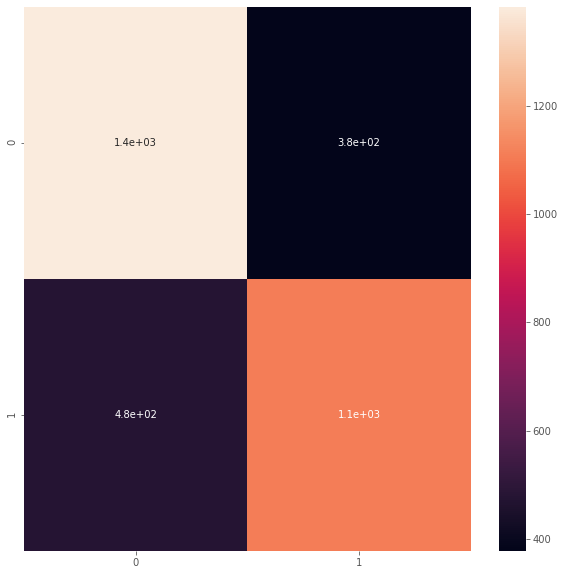

In [109]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True);

In [110]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

print('False Positive = ', fp)
print('False Negative = ', fn)
print('True Positive = ', tp)
print('True Negative = ', tn)

False Positive =  378
False Negative =  478
True Positive =  1111
True Negative =  1382


### ROC Curve

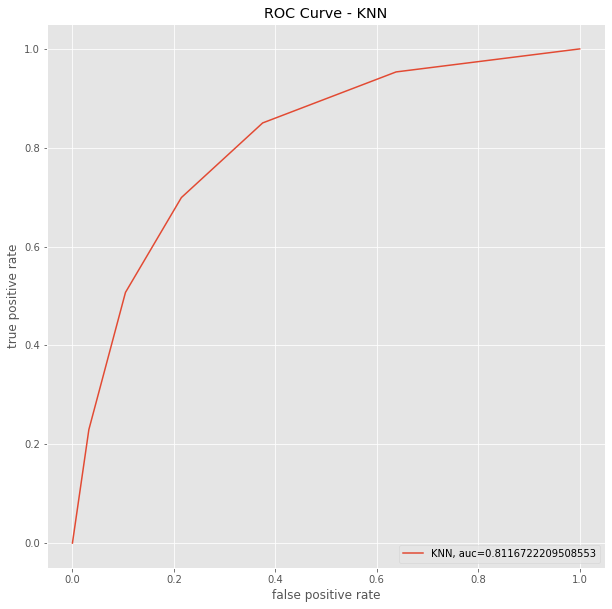

In [111]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Membandingkan Model

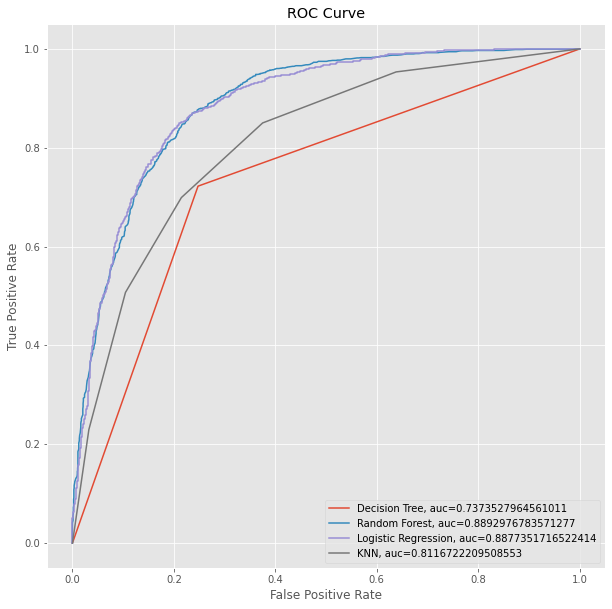

In [112]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.plot(fprlogmodel,tprlogmodel,label="Logistic Regression, auc="+str(auclogmodel))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Model terbaik adalah model yang dihasilkan dengan Random Forest dan Logistic Regression. Keduanya berada di angka auc 0.8891 dan 0.8877 yang dapat di lihat pada ROC curve di atas. Begitu pula yang ada pada metrics evaluasi sebelumnya (classification report dan confusion matrix)